## Gold price predictor


### Goal
Recently, emerging world economies, such as China, Russia, and India have been big buyers of gold, whereas the USA, SoUSA, South Africa, and Australia are among the big seller of gold.

Forecasting rise and fall in the daily gold rates can help investors to decide when to buy (or sell) the commodity. But Gold prices are dependent on many factors such as prices of other precious metals, prices of crude oil, stock exchange performance, Bonds prices, currency exchange rates, etc.

**Our goal in this project is to build a model that can predict gold adjusted closing prices, that investors can leverage to make well informed decisions.**

*Note: We have very little samples, so we are unable to train a model with a very good result; our goal will then be to demonstrate abilities.*


### Metric
We are using two main metrics to evaluate our model:
* Root-Mean-Squared-Error (RMSE)
* Mean Absolute Error (MAE)


### Dataset
[Download](https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset) dataset.

### Data description

*TODO: provide list of features here, as well as the description of each one*

In [128]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sb

from typing import List, Tuple

# import sys

# sys.path.append("../../../task-2-data-preprocessing/functions")
# from cleaning_utilities import *

from functions.modeling_utilities import *
from functions.cleaning_utilities import *

import pickle

%matplotlib inline

In [127]:
cleaned_data_folder="../../../data/cleaned"

exported_element_folder="./exports"

### Loading the dataset, and getting a quick overview about it

In [3]:
# Show all column when calling df.head()
pd.set_option("display.max_columns",None)

In [4]:
# Loading dataset
df = pd.read_csv(f"{cleaned_data_folder}/cleaned_dataset.csv")
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low    SP_close  SP_Ajclose  \
0  21521900  123.029999  123.199997  121.989998  122.180000  105.441238   
1  18124300  122.230003  122.949997  121.300003  121.589996  105.597549   
2  12547200  122.059998  122.320000  120.029999  120.290001  104.468536   
3   9136300  122.180000  124.139999  120.370003  123.930000  107.629784   
4  11996100  123.930000  124.360001  122.750000  124.169998  107.838242   

   SP_volume      DJ_open      DJ_high       DJ_low     DJ_close   DJ_Ajclose  \
0  199109200  11825.29004  11967.83984  11825.21973  11868.80957  11868.80957   
1  220481400  11870.25000  11968.17969  11819.30957  11866.38965  11866.38965   
2  183903000  11866.54004  11925.87988  11735.19043  11766.25977  11766.25977   
3  225418100  11769.20996  12117.12988  11768.83008  12103.58008  12103.58008   
4  194230900  12103.58008  12119.70020  11999.44043  12107.74023  12107.74023   

   DJ_volume    EG_open    EG_high     EG_low   EG_close  EG_Ajclose  \
0  136930000  74.550003  76.150002  72.150002  72.900002   70.431755   
1  389520000  73.599998  75.099998  73.349998  74.900002   72.364037   
2  135170000  69.099998  69.800003  64.199997  64.699997   62.509384   
3  165180000  66.449997  68.099998  66.000000  67.000000   64.731514   
4  163250000  67.099998  69.400002  66.900002  68.500000   66.180725   

   EG_volume  EU_Price  EU_open  EU_high  EU_low  EU_Trend  OF_Price  OF_Open  \
0     787900    1.3018   1.2982   1.3051  1.2957         1    105.09   104.88   
1     896600    1.3035   1.3020   1.3087  1.2997         1    103.35   103.51   
2    2096700    1.2995   1.3043   1.3044  1.2981         0    103.64   103.63   
3     875300    1.3079   1.3003   1.3133  1.2994         1    106.73   104.30   
4     837600    1.3045   1.3079   1.3197  1.3024         0    107.71   107.15   

   OF_High  OF_Low  OF_Volume  OF_Trend  OS_Price  OS_Open  OS_High  OS_Low  \
0   106.50  104.88      14330         1     93.42    94.91    96.00   93.33   
1   104.56  102.46     140080         0     93.79    93.43    94.80   92.53   
2   104.57  102.37     147880         1     94.09    93.77    94.43   92.55   
3   107.27  103.91     170240         1     95.55    96.39    99.70   96.39   
4   108.17  106.16     145090         1     99.01    97.54    99.26   96.81   

   OS_Trend  SF_Price  SF_Open  SF_High  SF_Low  SF_Volume  SF_Trend  \
0         0     53604    54248    54248   52316     119440         1   
1         1     53458    53650    54030   52890      65390         0   
2         1     52961    53400    53400   52544      67280         0   
3         1     53487    52795    53575   52595      55130         1   
4         1     53148    53519    54184   52937      75950         0   

   USB_Price  USB_Open  USB_High  USB_Low  USB_Trend  PLT_Price  PLT_Open  \
0      1.911     1.911     1.911    1.911          1    1414.65   1420.30   
1      1.851     1.851     1.851    1.851          0    1420.25   1414.75   
2      1.810     1.810     1.810    1.810          0    1411.10   1422.65   
3      1.927     1.927     1.927    1.927          1    1434.75   1408.95   
4      1.970     1.970     1.970    1.970          1    1429.05   1434.40   

   PLT_High  PLT_Low  PLT_Trend  PLD_Price  PLD_Open  PLD_High  PLD_Low  \
0   1423.35  1376.85          0     618.85    614.70    615.00   614.60   
1   1431.75  1400.70          1     623.65    622.60    623.45   622.30   
2   1427.60  1404.60          0     608.80    626.00    630.00   608.60   
3   1436.55  1408

In [5]:
# Number of samples and features
df.shape

(1718, 84)

In [6]:
# Dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

**Quick remarks about the informations**
* Number of sample : 1718
* All features have non-null value
* Features `Day, Month, Year` are redundant with feature `Date`. We will keep `Day, Month, Year`, because we are expecting the models to be able read more informations from them than `Date`.
* There are many features here, we should expect high colinearity between many of them.

In [7]:
# I will start by dropping features that have to little values to be used
useless_features = ["Date"]
drop_features(features_to_drop=useless_features,df=df,drop_in_place=True)

useless_features = []
df.head()

Open        High         Low       Close   Adj Close    Volume  \
0  154.740005  154.949997  151.710007  152.330002  152.330002  21521900   
1  154.309998  155.369995  153.899994  155.229996  155.229996  18124300   
2  155.479996  155.860001  154.360001  154.869995  154.869995  12547200   
3  156.820007  157.429993  156.580002  156.979996  156.979996   9136300   
4  156.979996  157.529999  156.130005  157.160004  157.160004  11996100   

      SP_open     SP_high      SP_low    SP_close  SP_Ajclose  SP_volume  \
0  123.029999  123.199997  121.989998  122.180000  105.441238  199109200   
1  122.230003  122.949997  121.300003  121.589996  105.597549  220481400   
2  122.059998  122.320000  120.029999  120.290001  104.468536  183903000   
3  122.180000  124.139999  120.370003  123.930000  107.629784  225418100   
4  123.930000  124.360001  122.750000  124.169998  107.838242  194230900   

       DJ_open      DJ_high       DJ_low     DJ_close   DJ_Ajclose  DJ_volume  \
0  11825.29004  11967.83984  11825.21973  11868.80957  11868.80957  136930000   
1  11870.25000  11968.17969  11819.30957  11866.38965  11866.38965  389520000   
2  11866.54004  11925.87988  11735.19043  11766.25977  11766.25977  135170000   
3  11769.20996  12117.12988  11768.83008  12103.58008  12103.58008  165180000   
4  12103.58008  12119.70020  11999.44043  12107.74023  12107.74023  163250000   

     EG_open    EG_high     EG_low   EG_close  EG_Ajclose  EG_volume  \
0  74.550003  76.150002  72.150002  72.900002   70.431755     787900   
1  73.599998  75.099998  73.349998  74.900002   72.364037     896600   
2  69.099998  69.800003  64.199997  64.699997   62.509384    2096700   
3  66.449997  68.099998  66.000000  67.000000   64.731514     875300   
4  67.099998  69.400002  66.900002  68.500000   66.180725     837600   

   EU_Price  EU_open  EU_high  EU_low  EU_Trend  OF_Price  OF_Open  OF_High  \
0    1.3018   1.2982   1.3051  1.2957         1    105.09   104.88   106.50   
1    1.3035   1.3020   1.3087  1.2997         1    103.35   103.51   104.56   
2    1.2995   1.3043   1.3044  1.2981         0    103.64   103.63   104.57   
3    1.3079   1.3003   1.3133  1.2994         1    106.73   104.30   107.27   
4    1.3045   1.3079   1.3197  1.3024         0    107.71   107.15   108.17   

   OF_Low  OF_Volume  OF_Trend  OS_Price  OS_Open  OS_High  OS_Low  OS_Trend  \
0  104.88      14330         1     93.42    94.91    96.00   93.33         0   
1  102.46     140080         0     93.79    93.43    94.80   92.53         1   
2  102.37     147880         1     94.09    93.77    94.43   92.55         1   
3  103.91     170240         1     95.55    96.39    99.70   96.39         1   
4  106.16     145090         1     99.01    97.54    99.26   96.81         1   

   SF_Price  SF_Open  SF_High  SF_Low  SF_Volume  SF_Trend  USB_Price  \
0     53604    54248    54248   52316     119440         1      1.911   
1     53458    53650    54030   52890      65390         0      1.851   
2     52961    53400    53400   52544      67280         0      1.810   
3     53487    52795    53575   52595      55130         1      1.927   
4     53148    53519    54184   52937      75950         0      1.970   

   USB_Open  USB_High  USB_Low  USB_Trend  PLT_Price  PLT_Open  PLT_High  \
0     1.911     1.911    1.911          1    1414.65   1420.30   1423.35   
1     1.851     1.851    1.851          0    1420.25   1414.75   1431.75   
2     1.810     1.810    1.810          0    1411.10   1422.65   1427.60   
3     1.927     1.927    1.927          1    1434.75   1408.95   1436.55   
4     1.970     1.970    1.970          1    1429.05   1434.40   1453.75   

   PLT_Low  PLT_Trend  PLD_Price  PLD_Open  PLD_High  PLD_Low  PLD_Trend  \
0  1376.85          0     618.85    614.70    615.00   614.60          1   
1  1400.70          1     623.65    622.60    623.45   622.30          1   
2  1404.60          0     608.80    626.00    630.00   608.60          0   
3  1408.15          1    

In [8]:
df.shape

(1718, 83)

In [9]:
# Number of N/A values
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_Adj Close    0
USO_Volume       0
Day              0
Month            0
Year             0
Length: 83, dtype: int64

In [10]:
# Number of Null values
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_Adj Close    0
USO_Volume       0
Day              0
Month            0
Year             0
Length: 83, dtype: int64

**Quick remarks about isna().sum() and isnull().sum()**

Although there are many columns which results cannot be seen, it can be observed that the result of `isna().sum()` and `isnull().sum()` are the same, so we don't have to suspect underlying problems with the data we have.

In [11]:
# Drop NA (just to double-check that we didn't miss anything)
df.dropna(inplace=True)
df.shape

(1718, 83)

In [12]:
# Drop duplicates
df.drop_duplicates()
df.shape

(1718, 83)

### Dealing with multicolinearity

In [13]:
# Correlation between our numerical variables
corr = df.corr()
corr

Open      High       Low     Close  Adj Close    Volume  \
Open           1.000000  0.999515  0.999442  0.998976   0.998976  0.251921   
High           0.999515  1.000000  0.999262  0.999535   0.999535  0.261064   
Low            0.999442  0.999262  1.000000  0.999532   0.999532  0.237031   
Close          0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
Adj Close      0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
...                 ...       ...       ...       ...        ...       ...   
USO_Adj Close  0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Volume    -0.455920 -0.454913 -0.457628 -0.456193  -0.456193  0.069580   
Day            0.001489  0.000868  0.001302  0.000728   0.000728 -0.024024   
Month         -0.149522 -0.151616 -0.149126 -0.151728  -0.151728 -0.115925   
Year          -0.671202 -0.674556 -0.668077 -0.671165  -0.671165 -0.149455   

                SP_open   SP_high    SP_low  SP_close  SP_Ajclose  SP_volume  \
Open          -0.684314 -0.684597 -0.683464 -0.683998   -0.665788   0.242265   
High          -0.688118 -0.688365 -0.687325 -0.687817   -0.669657   0.247883   
Low           -0.680911 -0.681242 -0.679988 -0.680567   -0.662325   0.235838   
Close         -0.684618 -0.684904 -0.683750 -0.684284   -0.666071   0.241949   
Adj Close     -0.684618 -0.684904 -0.683750 -0.684284   -0.666071   0.241949   
...                 ...       ...       ...       ...         ...        ...   
USO_Adj Close -0.773099 -0.773957 -0.771928 -0.773159   -0.785103   0.251419   
USO_Volume     0.375568  0.377996  0.371390  0.374658    0.386096   0.045722   
Day            0.015288  0.014967  0.015587  0.014380    0.016713  -0.010920   
Month          0.111617  0.111244  0.111541  0.110669    0.112776  -0.078750   
Year           0.963891  0.964700  0.962828  0.963951    0.970270  -0.361424   

                DJ_open   DJ_high    DJ_low  DJ_close  DJ_Ajclose  DJ_volume  \
Open          -0.588615 -0.588534 -0.587941 -0.588179   -0.588179  -0.155915   
High          -0.592459 -0.592376 -0.591864 -0.592072   -0.592072  -0.157978   
Low           -0.585021 -0.585009 -0.584304 -0.584592   -0.584592  -0.153442   
Close         -0.588800 -0.588778 -0.588157 -0.588411   -0.588411  -0.155526   
Adj Close     -0.588800 -0.588778 -0.588157 -0.588411   -0.588411  -0.155526   
...                 ...       ...       ...       ...         ...        ...   
USO_Adj Close -0.721539 -0.721857 -0.720646 -0.721378   -0.721378  -0.470608   
USO_Volume     0.315246  0.316818  0.310782  0.313761    0.313761   0.166826   
Day            0.015482  0.014971  0.016444  0.014729    0.014729   0.041722   
Month          0.102246  0.102088  0.103543  0.102431    0.102431  -0.031400   
Year           0.943324  0.943735  0.942556  0.943308    0.943308   0.641654   

                EG_open   EG_high    EG_low  EG_close  EG_Ajclose  EG_volume  \
Open           0.863226  0.861273  0.863740  0.862066    0.859143  -0.127269   
High           0.864864  0.863336  0.865556  0.864276    0.861358  -0.124106   
Low            0.861282  0.859493  0.862220  0.860614    0.857697  -0.129967   
Close          0.862900  0.861479  0.863917  0.862770    0.859850  -0.126586   
Adj Close      0.862900  0.861479  0.863917  0.862770    0.859850  -0.126586   
...                 ...       ...       ...       ...         ...        ...   
USO_Adj Close  0.812185  0.812206  0.813235  0.812468    0.814141  -0.225570   
USO_Volume    -0.494368 -0.493028 -0.496713 -0.494390   -0.495517   0.128743   
Day           -0.003738 -0.003567 -0.004125 -0.003017   -0.003226   0.017613   
Month         -0.097573 -0.097154 -0.097485 -0.097627   -0.097519  -0.066405   
Year          -0.916546 -0.917736 -0.915820 -0.916468   -0.917986   0.252178   

               EU_Price   EU_open   EU_high    EU_low  EU_Trend  OF_Price  \
Open           0.580586  0.579304  0.582948  0.577043  0.010250  0.710348   
High           0.581787  0.580143  0.584050  

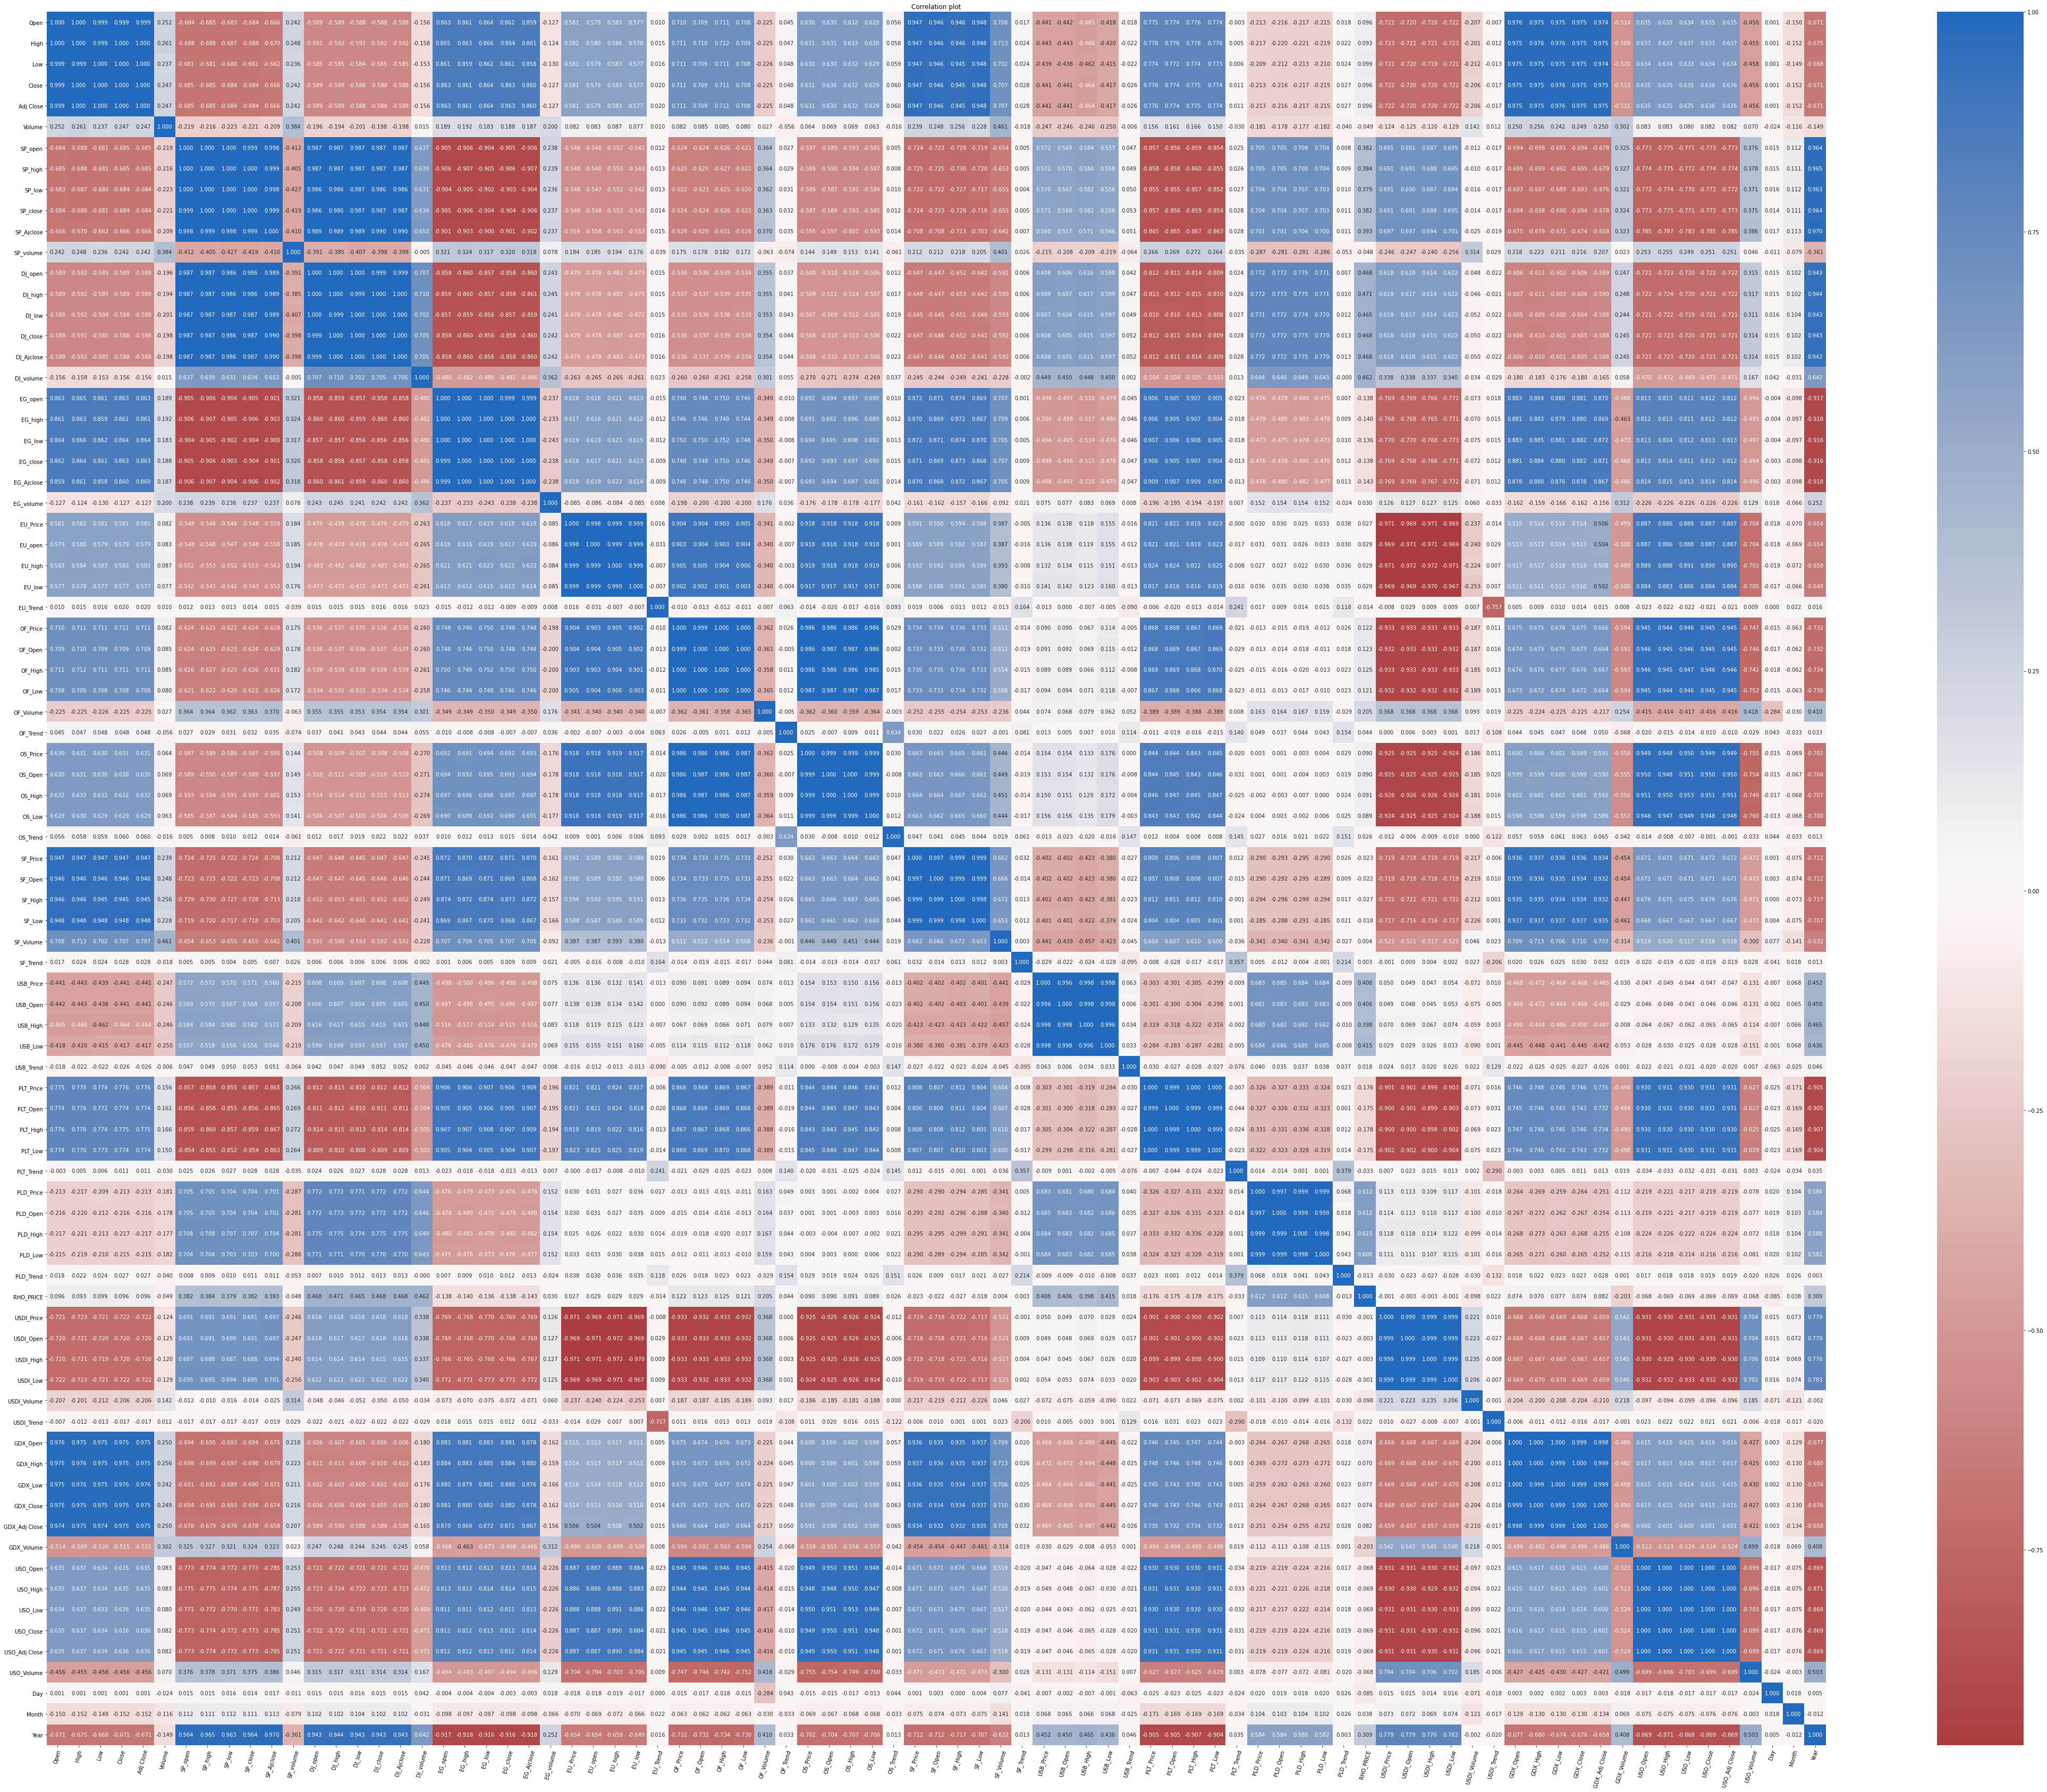

In [14]:
# Heatmap of the correlation in the previous cell
plt.figure(figsize = [75, 60])
sb.heatmap(corr, annot = True, fmt = ".3f", cmap = "vlag_r", center = 0)
#plt.show()

plt.title("Correlation plot")

plt.xticks(rotation=75)
plt.yticks(rotation=0);

plt.savefig("exports/correlation heatmap.png")

The plot is too congested to easily read informations from it. But:
* we can see that many features are highly correlated
* when we zoom-in on the exported image, we can identify those features with high correlations.

We are going to drop features which correlation are higher than +/- 0.66

In [17]:
# I will start by dropping features that have to little values to be used
useless_features = [
    
    ## ========= Feature highly correlated with `Open` ============= ##
    "High", # correlated with `Open` (correlation: 1)
    "Low", # correlated with `Open` (correlation: 0.99)
    "Close", # correlated with `Open` (correlation: 0.99)
    "SP_open", # correlated with `Open` (correlation: -0.68)
    "SP_high", # correlated with `Open` (correlation: -0.68)
    "SP_low", # correlated with `Open` (correlation: -0.68)
    "SP_close", # correlated with `Open` (correlation: -0.68)
#     "SP_Ajclose", # correlated with `Open` (correlation: -0.66)
    "EG_open", # correlated with `Open` (correlation: 0.86)
    "EG_high", # correlated with `Open` (correlation: 0.86)
    "EG_low", # correlated with `Open` (correlation: 0.86)
    "EG_close", # correlated with `Open` (correlation: 0.86)
    "EG_Ajclose", # correlated with `Open` (correlation: 0.86)
    "OF_Price", # correlated with `Open` (correlation: 0.7)
    "OF_Open", # correlated with `Open` (correlation: 0.7)
    "OF_High", # correlated with `Open` (correlation: 0.7)
    "OF_Low", # correlated with `Open` (correlation: 0.7)
    "SF_Price", # correlated with `Open` (correlation: 0.94)
    "SF_Open", # correlated with `Open` (correlation: 0.94)
    "SF_High", # correlated with `Open` (correlation: 0.94)
    "SF_Low", # correlated with `Open` (correlation: 0.94)
    "SF_Volume", # correlated with `Open` (correlation: 0.7)
    "PLT_Price", # correlated with `Open` (correlation: 0.7)
    "PLT_Open", # correlated with `Open` (correlation: 0.7)
    "PLT_High", # correlated with `Open` (correlation: 0.7)
    "PLT_Low", # correlated with `Open` (correlation: 0.7)
    "USDI_Price", # correlated with `Open` (correlation: -0.7)
    "USDI_Open", # correlated with `Open` (correlation: -0.7)
    "USDI_High", # correlated with `Open` (correlation: -0.7)
    "USDI_Low", # correlated with `Open` (correlation: -0.7)
    "GDX_Open", # correlated with `Open` (correlation: 0.9)
    "GDX_High", # correlated with `Open` (correlation: 0.9)
    "GDX_Low", # correlated with `Open` (correlation: 0.9)
    "GDX_Close", # correlated with `Open` (correlation: 0.9)
    "GDX_Adj Close", # correlated with `Open` (correlation: 0.9)
#     "Year", # correlated with `Open` (correlation: -0.67)
    
    
    ## ========= Feature highly correlated with `SP_Ajclose` ============= ##
    "DJ_open", # correlated with `SP_Ajclose` (correlation: 0.98)
    "DJ_high", # correlated with `SP_Ajclose` (correlation: 0.98)
    "DJ_low", # correlated with `SP_Ajclose` (correlation: 0.98)
    "DJ_close", # correlated with `SP_Ajclose` (correlation: 0.99)
    "DJ_Ajclose", # correlated with `SP_Ajclose` (correlation: 0.99)
#     "DJ_volume", # correlated with `SP_Ajclose` (correlation: 0.65)
    "PLD_Price", # correlated with `SP_Ajclose` (correlation: 0.7)
    "PLD_Open", # correlated with `SP_Ajclose` (correlation: 0.7)
    "PLD_High", # correlated with `SP_Ajclose` (correlation: 0.7)
    "PLD_Low", # correlated with `SP_Ajclose` (correlation: 0.7)
    

    "USO_Open", # correlated with `SP_Ajclose` (correlation: -0.78)
    "USO_High", # correlated with `SP_Ajclose` (correlation: -0.78)
    "USO_Low", # correlated with `SP_Ajclose` (correlation: -0.78)
    "USO_Close", # correlated with `SP_Ajclose` (correlation: -0.78)
    "USO_Adj Close", # correlated with `SP_Ajclose` (correlation: -0.78)
#     "Year", # correlated with `SP_Ajclose` (correlation: 0.98)
    
    ## ========= Feature highly correlated with `EU_Price` ============= ##
    "EU_open", # correlated with `EU_Price` (correlation: 0.99)
    "EU_high", # correlated with `EU_Price` (correlation: 0.99)
    "EU_low", # correlated with `EU_Price` (correlation: 0.99)
    "OS_Price", # correlated with `EU_Price` (correlation: 0.91)
    "OS_Open", # correlated with `EU_Price` (correlation: 0.91)
    "OS_High", # correlated with `EU_Price` (correlation: 0.91)
    "OS_Low", # correlated with `EU_Price` (correlation: 0.91)
    "USO_Volume", # correlated with `EU_Price` (correlation: -0.7)
#     "Year", # correlated with `EU_Price` (correlation: -0.65)
    
    ## ========= Feature highly correlated with `USB_Price` ============= ##
    "USB_Open", # correlated with `USB_Price` (correlation: 0.99)
    "USB_High", # correlated with `USB_Price` (correlation: 0.99)
    "USB_Low", # correlated with `USB_Price` (correlation: 0.99)
    
    ## ========= Other features highly correlated  ============= ##
    "EU_Trend", # correlated with `USDI_Trend` (correlation: -0.75)
    "SP_Ajclose", # correlated with `Year` (correlation: 0.9)
    
]

# Making sure output feature was not accidentally put in those that need to be removed
output_feature = "Adj Close"
if output_feature in useless_features:
    print("Output feature accidentally put in features to remove")
    useless_features.remove(output_feature)

print(f"Shape Before dropping: {df.shape}")

df.drop(useless_features,axis=1,inplace=True)

useless_features = []

print(f"Shape Before dropping: {df.shape}")

Shape Before dropping: (1718, 83)
Shape Before dropping: (1718, 22)


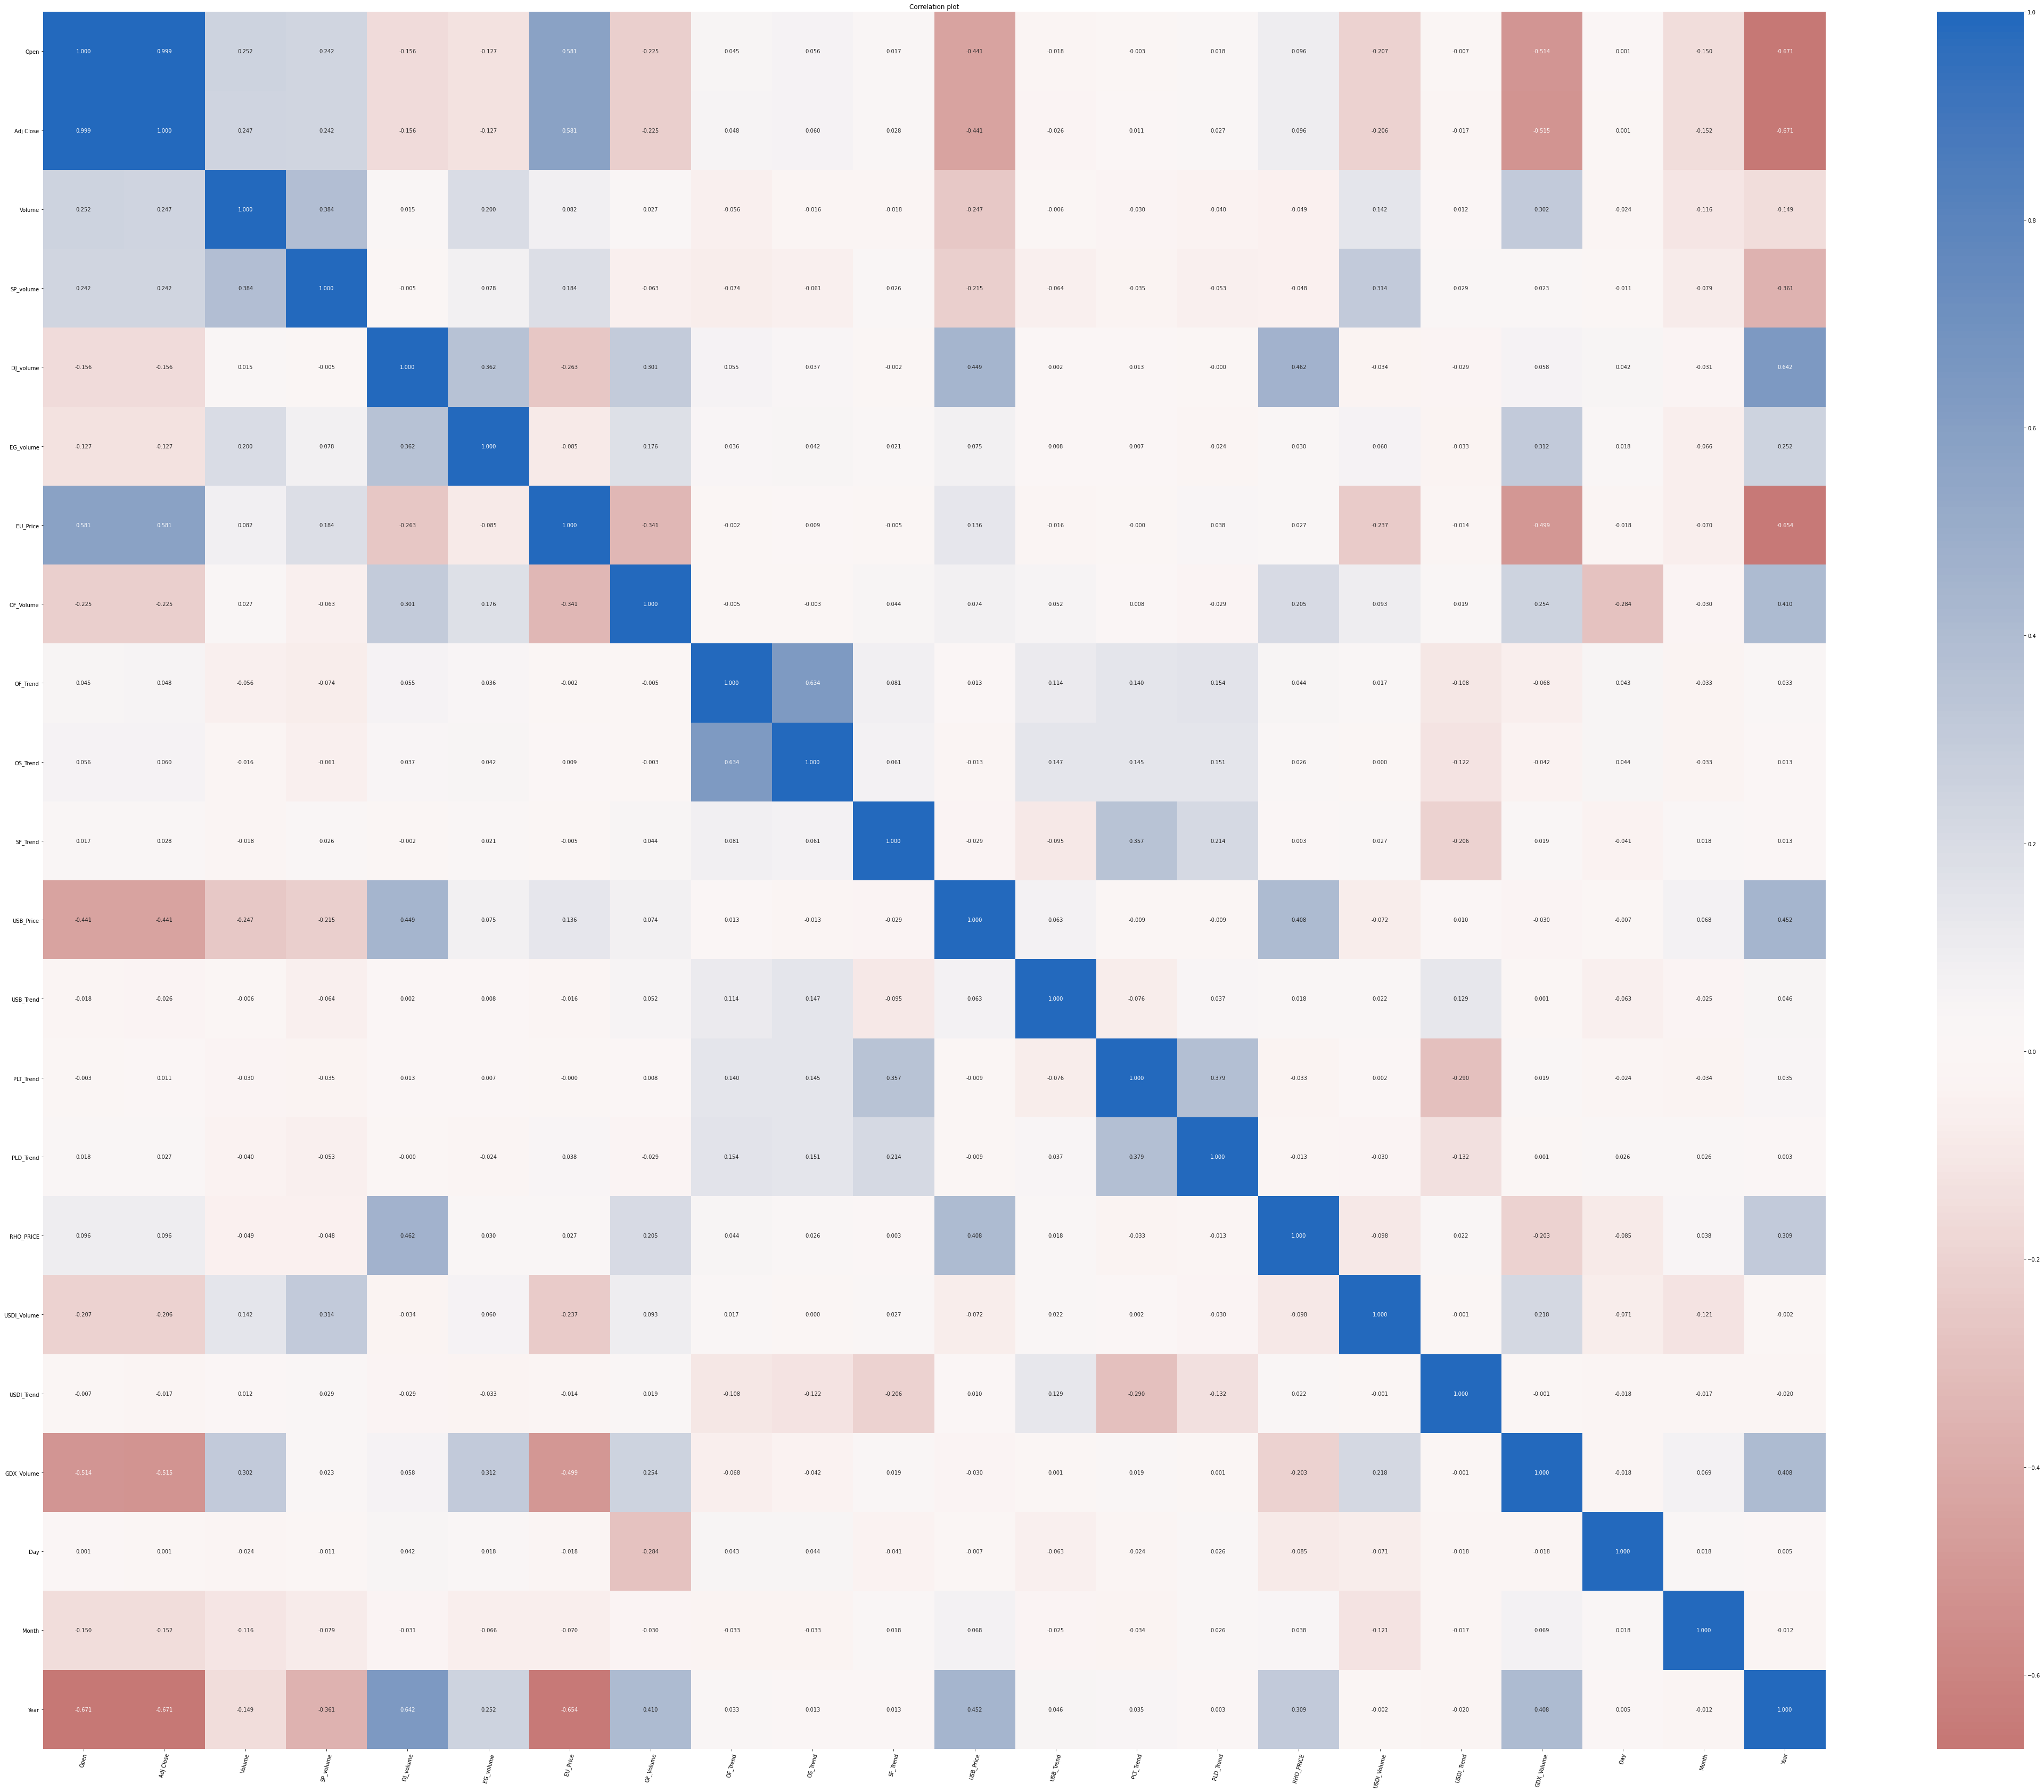

In [18]:
# Plotting a new heatmap of the correlation after dropping highly correlated input features
plt.figure(figsize = [75, 60])
sb.heatmap(df.corr(), annot = True, fmt = ".3f", cmap = "vlag_r", center = 0)
#plt.show()

plt.title("Correlation plot")

plt.xticks(rotation=75);
plt.yticks(rotation=0);

plt.savefig("exports/correlation heatmap.png")

Though some features can also be dropped, we are satisfied with things as how they are. Now let's deal with the outliers.

### Dealing with outliers

In [19]:
df.describe()

Open    Adj Close        Volume     SP_volume     DJ_volume  \
count  1718.000000  1718.000000  1.718000e+03  1.718000e+03  1.718000e+03   
mean    127.323434   127.319482  8.446327e+06  1.098026e+08  1.779131e+08   
std      17.526993    17.536269  4.920731e+06  4.925110e+07  1.212753e+08   
min     100.919998   100.500000  1.501600e+06  2.785650e+07  8.410000e+06   
25%     116.220001   116.052502  5.412925e+06  7.387085e+07  9.232000e+07   
50%     121.915001   121.795002  7.483900e+06  9.972020e+07  1.206950e+08   
75%     128.427494   128.470001  1.020795e+07  1.351161e+08  2.636300e+08   
max     173.199997   173.610001  9.380420e+07  5.072443e+08  9.005100e+08   

          EG_volume     EU_Price      OF_Volume     OF_Trend     OS_Trend  \
count  1.718000e+03  1718.000000    1718.000000  1718.000000  1718.000000   
mean   1.136074e+06     1.208494  225958.585565     0.498836     0.503492   
std    7.301289e+05     0.100535   88844.540581     0.500144     0.500133   
min    1.645000e+05     1.038700   11520.000000     0.000000     0.000000   
25%    7.006250e+05     1.120800  175940.000000     0.000000     0.000000   
50%    9.688000e+05     1.184050  223485.000000     0.000000     1.000000   
75%    1.344775e+06     1.305550  281382.500000     1.000000     1.000000   
max    1.006120e+07     1.393400  567760.000000     1.000000     1.000000   

          SF_Trend    USB_Price    USB_Trend    PLT_Trend    PLD_Trend  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean      0.480792     2.262769     0.490105     0.484284     0.530850   
std       0.499776     0.433469     0.500048     0.499898     0.499193   
min       0.000000     1.358000     0.000000     0.000000     0.000000   
25%       0.000000     1.905250     0.000000     0.000000     0.000000   
50%       0.000000     2.259000     0.000000     0.000000     1.000000   
75%       1.000000     2.597000     1.000000     1.000000     1.000000   
max       1.000000     3.239000     1.000000     1.000000     1.000000   

         RHO_PRICE    USDI_Volume   USDI_Trend    GDX_Volume          Day  \
count  1718.000000    1718.000000  1718.000000  1.718000e+03  1718.000000   
mean   1130.442375   27568.300349     0.512806  4.356515e+07    15.655995   
std     570.012881   14643.314699     0.499982  2.909151e+07     8.700066   
min       0.000000      60.000000     0.000000  4.729000e+06     1.000000   
25%     785.000000   18137.500000     0.000000  2.259968e+07     8.000000   
50%    1100.000000   24445.000000     1.000000  3.730465e+07    16.000000   
75%    1307.500000   33745.000000     1.000000  5.697055e+07    23.000000   
max    2600.000000  142820.000000     1.000000  2.321536e+08    31.000000   

             Month         Year  
count  1718.000000  1718.000000  
mean      6.548312  2015.010477  
std       3.425341     2.017658  
min       1.000000  2011.000000  
25%       4.000000  2013.000000  
50%       7.000000  2015.000000  
75%      10.000000  2017.000000  
max      12.000000  2018.000000

*There are too many features to make a quick analysis with `.describe()` only. But the charts bellow will give us more informations about each feature.*

Processing column : Open
Processing column : Adj Close
Processing column : Volume
Processing column : SP_volume
Processing column : DJ_volume
Processing column : EG_volume
Processing column : EU_Price
Processing column : OF_Volume
Processing column : OF_Trend
Processing column : OS_Trend
Processing column : SF_Trend
Processing column : USB_Price
Processing column : USB_Trend
Processing column : PLT_Trend
Processing column : PLD_Trend
Processing column : RHO_PRICE
Processing column : USDI_Volume
Processing column : USDI_Trend
Processing column : GDX_Volume
Processing column : Day
Processing column : Month
Processing column : Year


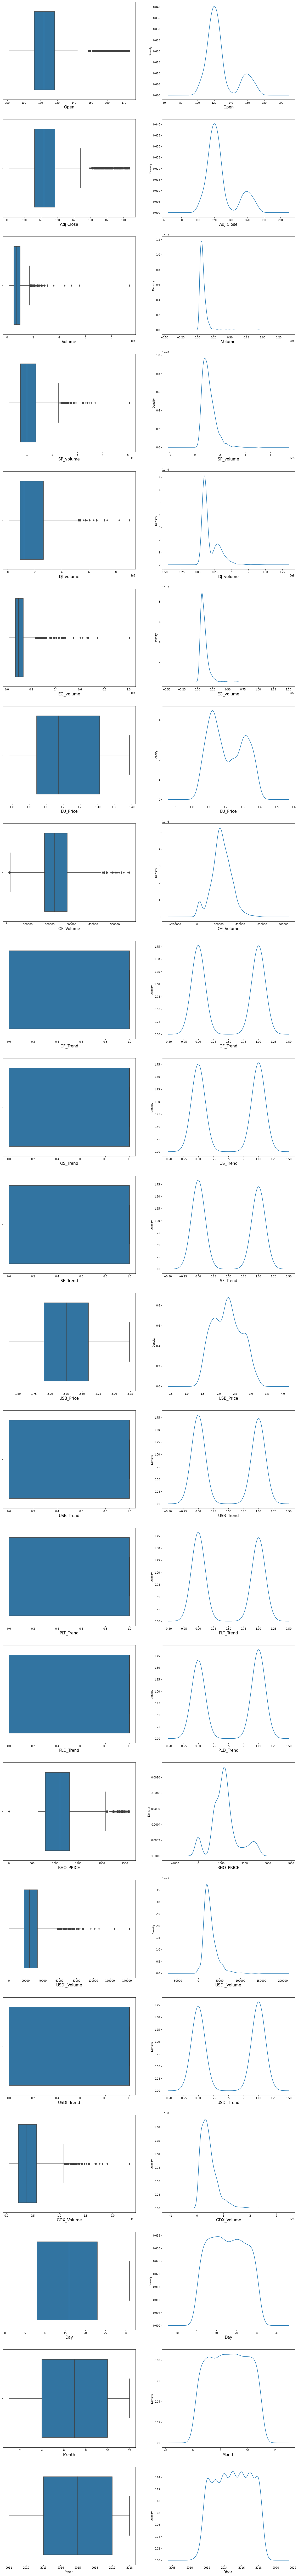

In [21]:
plot_distribution_in_features(df=df) #, fig_height=360


❗**Observation** :  
* We have outliers in many features. This is an issue because we don't have that many sample to start with, so removing those outliers will leave us with even less samples.
* Although `Day` and `Month` are in a numerical form, let's recall that they are categorical variables that were encoded.

In [22]:
# Saving the current df before starting dealing with outliers
df_with_outliers = df.copy()
df.shape, df_with_outliers.shape

((1718, 22), (1718, 22))

In [23]:
# Ignoring Day and Month variable, since they are encoded categorical variables
features_to_ignore_when_dealing_with_outliers = ["Day","Month"]

In [ ]:
# # Replotting the outliers, to only have numerical variables plotted
# plot_distribution_in_features(df=df,features_to_ignore=features_to_ignore_when_dealing_with_outliers)

In [ ]:
# df.columns.to_list()

In [24]:
df = remove_outliers_in_features(df=df, features_to_ignore=features_to_ignore_when_dealing_with_outliers)

df.shape before outliers removal : (1718, 22)
Total number of outliers in data : 847
df.shape after outliers removal : (871, 20)


❗ **Observation**   
Nearly half of the samples are considered outliers. And there is not much data left to work with after outliers were removed.
The way the data was collected should be reviewed, and tuned in order to improve the quality of the samples (have less outliers).    
Another way to resolve the issue is to use Data Augmentation in order to generate new but good datas based on the original good samples.
     
*Since the data come from Kaggle, the work will be continued as such, with the remaining 871 samples*

(871, 20)

After the removal of outliers, only one occurence may remains in some features. This generate a `LinAlgError: singular matrix` error when trying to plot them in a box plot with `plot_distribution_in_features()`, which is normal since all values are, as I said, the same. So those features shall immediatly been dropped.

In [26]:
# Dropping feature with one occurences if they exist
df = drop_features_with_one_occurence(df)

Shape before processing: (871, 20)
Shape after processing: (871, 20)


We can see that we don't have features with only one occurence in their content.

In [ ]:
# df.head().T

In [ ]:
# df.columns

Processing column : Open
Processing column : Adj Close
Processing column : Volume
Processing column : SP_volume
Processing column : DJ_volume
Processing column : EG_volume
Processing column : EU_Price
Processing column : OF_Volume
Processing column : OF_Trend
Processing column : OS_Trend
Processing column : SF_Trend
Processing column : USB_Price
Processing column : USB_Trend
Processing column : PLT_Trend
Processing column : PLD_Trend
Processing column : RHO_PRICE
Processing column : USDI_Volume
Processing column : USDI_Trend
Processing column : GDX_Volume
Processing column : Year


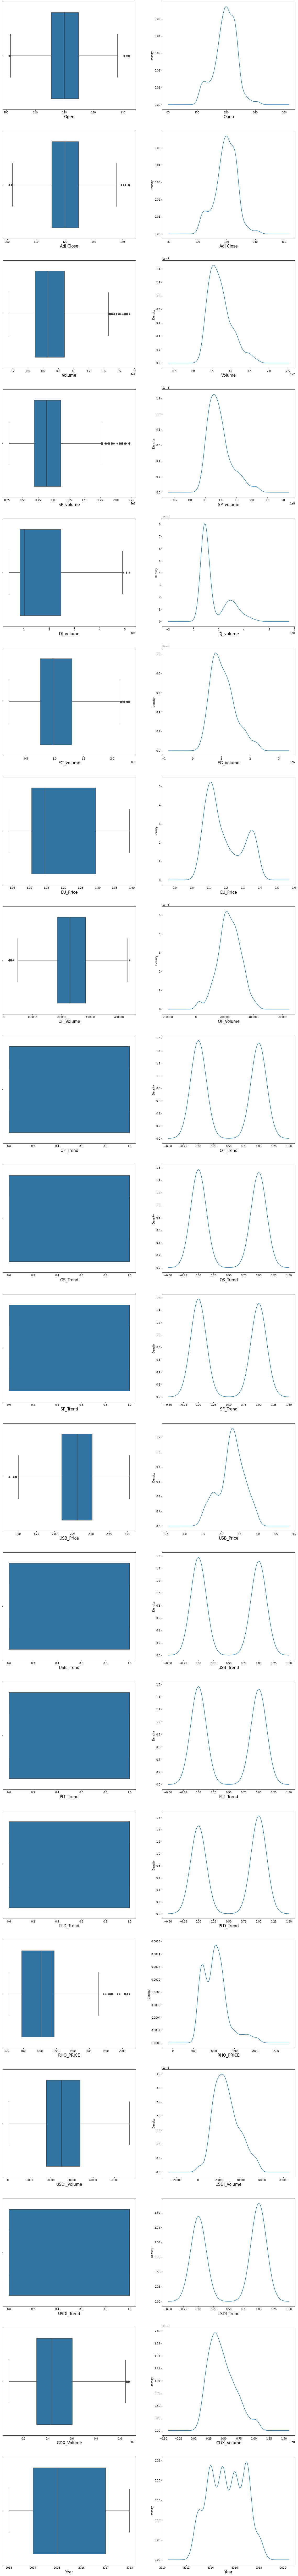

In [27]:
# Checking outliers status in the samples after the 1st removal
plot_distribution_in_features(df=df,features_to_ignore=features_to_ignore_when_dealing_with_outliers)

In [ ]:
# # Dropping feature with one occurence after outliers removal
# df = drop_features_with_one_occurence(df)

### Manual removal of outliers in `Adj Close` 
Since this is our output variable, we will remove its outliers

In [28]:
column="Adj Close"

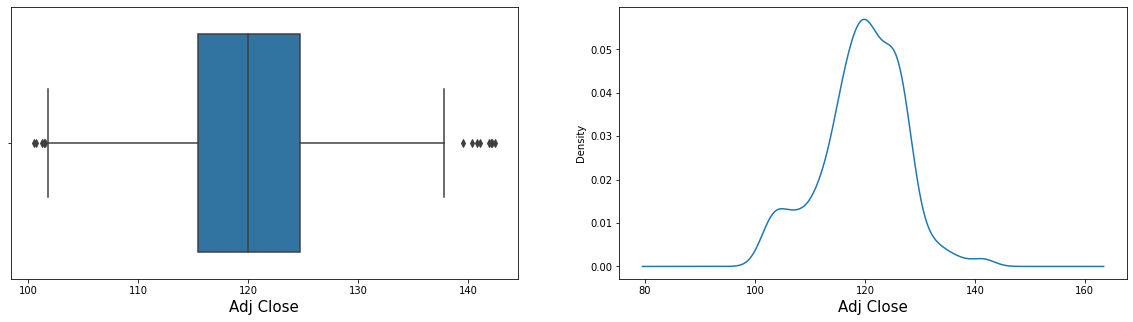

In [29]:
plot_distribution_in_feature(df=df, feature=column)

In [30]:
upper_bound_value= 135

In [31]:
print(sorted(set(df[ df[column] > upper_bound_value ][column].to_list())))

[135.229996, 135.869995, 136.419998, 136.699997, 136.71000700000002, 136.75, 137.809998, 139.600006, 140.380005, 140.809998, 141.110001, 141.919998, 142.089996, 142.149994, 142.46000700000005]


df.shape before outliers removal : (856, 20)
Total number of outliers in data : 5
df.shape after outliers removal : (851, 20)


D:\WorkBench\Cours\Hamoye\Team\01 - gold prices\src\tasks\task-4-model-development\ekoue\functions\cleaning_utilities.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers_indexes,inplace=drop_in_place, axis=0)


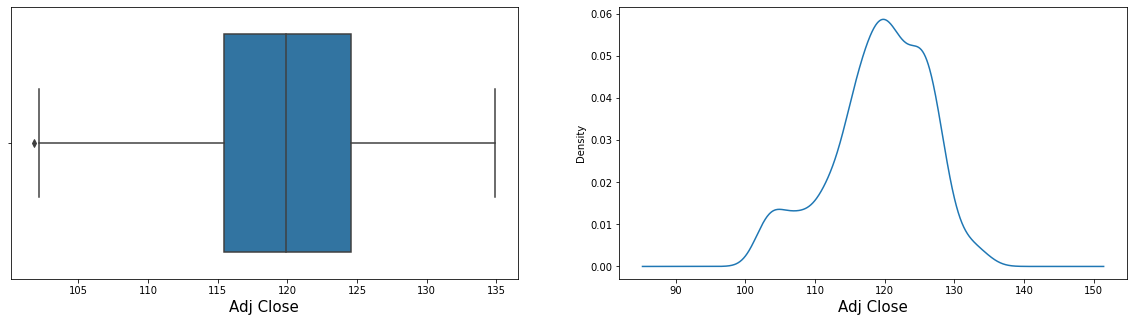

In [32]:
new_df = remove_upper_bound_outliers_in_feature(df=df,feature=column, upper_bound=upper_bound_value)

In [33]:
df = new_df
# df = new_df.copy(deep=True)

In [34]:
lower_bound_value=105

In [35]:
print(sorted(set(df[ df[column] < lower_bound_value ][column].to_list())))

[101.790001, 102.199997, 102.260002, 102.269997, 102.279999, 102.309998, 102.339996, 102.43, 102.459999, 102.550003, 102.610001, 102.639999, 102.669998, 102.75, 102.839996, 102.889999, 102.940002, 103.050003, 103.089996, 103.110001, 103.150002, 103.18, 103.559998, 103.709999, 103.830002, 103.849998, 103.93, 103.980003, 104.019997, 104.099998, 104.18, 104.209999, 104.269997, 104.309998, 104.330002, 104.389999, 104.400002, 104.669998, 104.720001, 104.739998, 104.800003, 104.860001]


In [36]:
lower_bound_value = 102

df.shape before outliers removal : (850, 20)
Total number of outliers in data : 0
df.shape after outliers removal : (850, 20)


D:\WorkBench\Cours\Hamoye\Team\01 - gold prices\src\tasks\task-4-model-development\ekoue\functions\cleaning_utilities.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers_indexes,inplace=drop_in_place, axis=0)


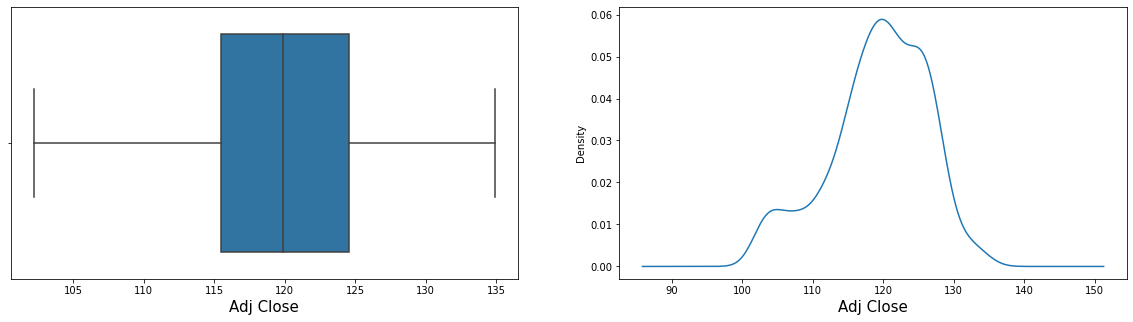

In [37]:
# Removing lower bound outliers
new_df = remove_lower_bound_outliers_in_feature(df=df,feature=column, lower_bound=lower_bound_value)

In [38]:
df = new_df
# df = new_df.copy(deep=True)

### Checking outliers presence in all features

Processing column : Open
Processing column : Adj Close
Processing column : Volume
Processing column : SP_volume
Processing column : DJ_volume
Processing column : EG_volume
Processing column : EU_Price
Processing column : OF_Volume
Processing column : OF_Trend
Processing column : OS_Trend
Processing column : SF_Trend
Processing column : USB_Price
Processing column : USB_Trend
Processing column : PLT_Trend
Processing column : PLD_Trend
Processing column : RHO_PRICE
Processing column : USDI_Volume
Processing column : USDI_Trend
Processing column : GDX_Volume
Processing column : Year


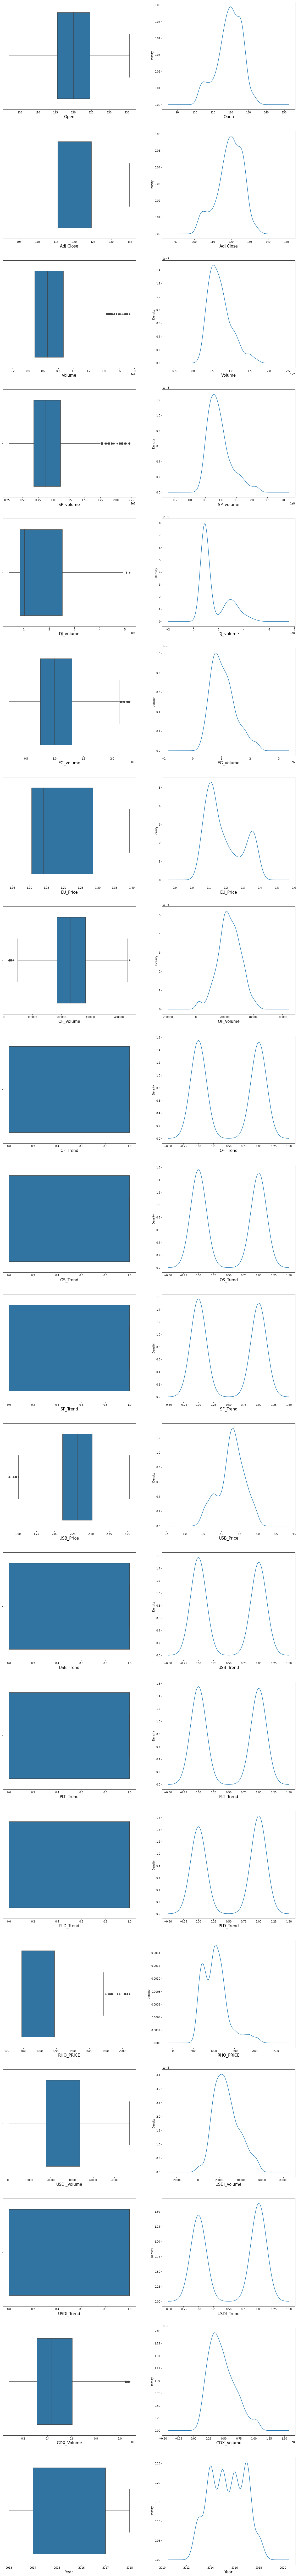

In [39]:
# Checking outliers status in the samples after the manual removal
plot_distribution_in_features(df=df,features_to_ignore=features_to_ignore_when_dealing_with_outliers)

### Manual removal of outliers in `Volume`

In [40]:
column = "Volume"

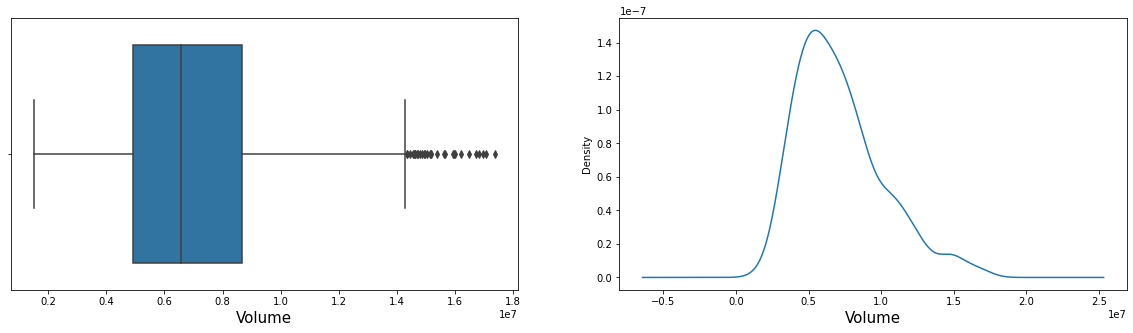

In [41]:
plot_distribution_in_feature(df=df, feature=column)

In [44]:
upper_bound_value= 1.4e7
upper_bound_value

14000000.0

In [45]:
print(sorted(set(df[ df[column] > upper_bound_value ][column].to_list())))

[14281000, 14339700, 14353900, 14447100, 14542500, 14585600, 14612800, 14626800, 14697100, 14718100, 14809300, 14858300, 14940700, 14957400, 15053000, 15133600, 15188000, 15192000, 15395800, 15608000, 15644000, 15945200, 15972600, 16001500, 16205100, 16469500, 16721100, 16818400, 16981200, 17065400, 17376700]


df.shape before outliers removal : (819, 20)
Total number of outliers in data : 2
df.shape after outliers removal : (817, 20)


D:\WorkBench\Cours\Hamoye\Team\01 - gold prices\src\tasks\task-4-model-development\ekoue\functions\cleaning_utilities.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers_indexes,inplace=drop_in_place, axis=0)


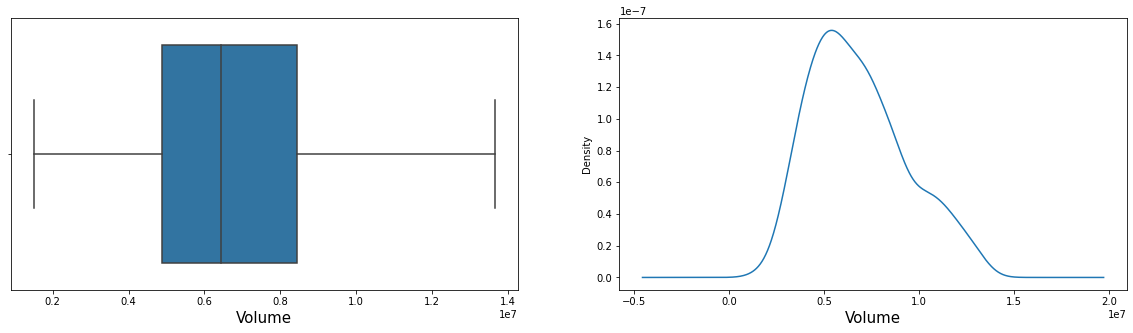

In [46]:
new_df = remove_upper_bound_outliers_in_feature(df=df,feature=column, upper_bound=upper_bound_value)

In [47]:
df = new_df
# df = new_df.copy(deep=True)

### Checking outliers presence in all features

Processing column : Open
Processing column : Adj Close
Processing column : Volume
Processing column : SP_volume
Processing column : DJ_volume
Processing column : EG_volume
Processing column : EU_Price
Processing column : OF_Volume
Processing column : OF_Trend
Processing column : OS_Trend
Processing column : SF_Trend
Processing column : USB_Price
Processing column : USB_Trend
Processing column : PLT_Trend
Processing column : PLD_Trend
Processing column : RHO_PRICE
Processing column : USDI_Volume
Processing column : USDI_Trend
Processing column : GDX_Volume
Processing column : Year


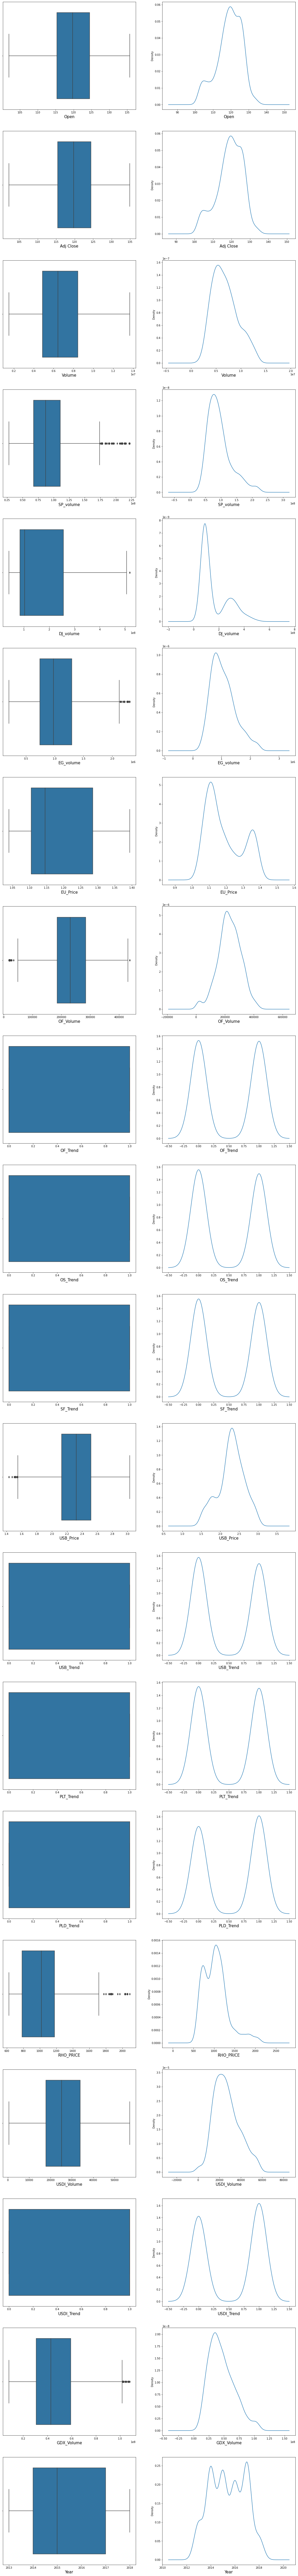

In [48]:
# Checking outliers status in the samples after the manual removal
plot_distribution_in_features(df=df,features_to_ignore=features_to_ignore_when_dealing_with_outliers)

### Manual removal of outliers in `SP_volume`

In [49]:
column="SP_volume"

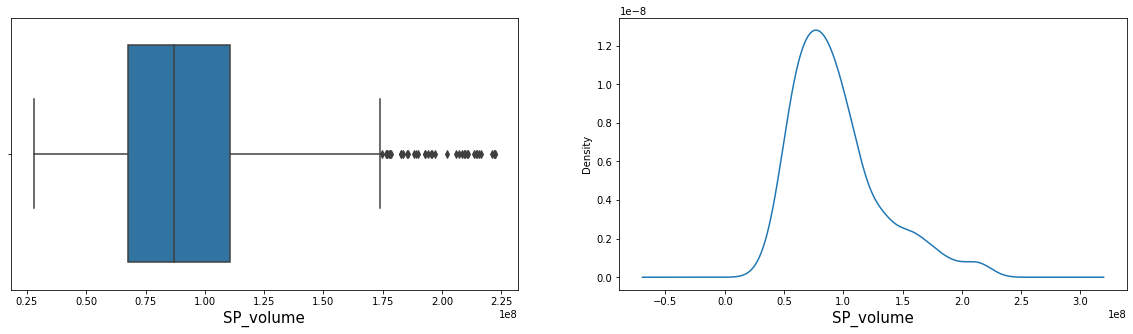

In [50]:
plot_distribution_in_feature(df=df, feature=column)

In [57]:
upper_bound_value= 1.7e8
upper_bound_value

170000000.0

In [58]:
print(sorted(set(df[ df[column] > upper_bound_value ][column].to_list())))

[170787200, 172330500, 172946000, 172959000, 173585400, 173820200, 174911700, 176267300, 176698000, 176850100, 176855100, 177798000, 178015000, 178515900, 182564900, 182828800, 183479000, 185113200, 185681700, 188128000, 189261000, 189965800, 192913900, 192991100, 194327900, 195244400, 195955000, 197017000, 202330200, 206149500, 207081000, 208677100, 209151400, 209817200, 210705000, 211173300, 213436100, 214553300, 214625000, 215847000, 216597300, 221168900, 221909000, 222329000, 222353500]


df.shape before outliers removal : (772, 20)
Total number of outliers in data : 10
df.shape after outliers removal : (762, 20)


D:\WorkBench\Cours\Hamoye\Team\01 - gold prices\src\tasks\task-4-model-development\ekoue\functions\cleaning_utilities.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers_indexes,inplace=drop_in_place, axis=0)


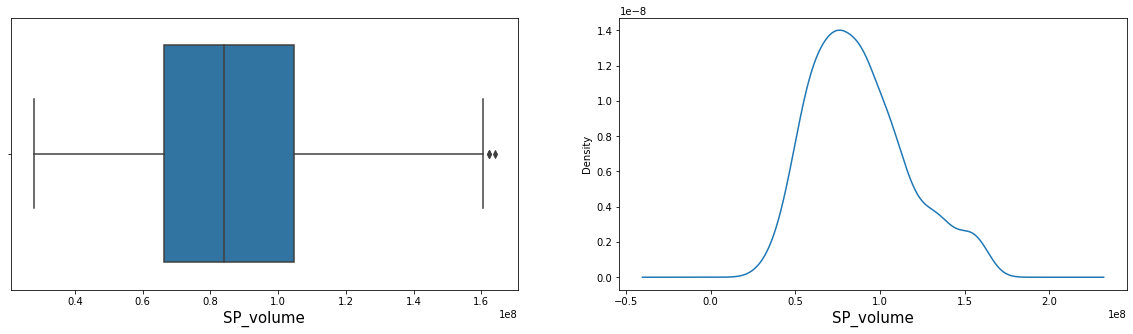

In [59]:
new_df = remove_upper_bound_outliers_in_feature(df=df,feature=column, upper_bound=upper_bound_value)

Although there are still two outliers, we will let them as such since we don't have many data.

In [60]:
df = new_df

### Checking outliers presence in all features

Processing column : Open
Processing column : Adj Close
Processing column : Volume
Processing column : SP_volume
Processing column : DJ_volume
Processing column : EG_volume
Processing column : EU_Price
Processing column : OF_Volume
Processing column : OF_Trend
Processing column : OS_Trend
Processing column : SF_Trend
Processing column : USB_Price
Processing column : USB_Trend
Processing column : PLT_Trend
Processing column : PLD_Trend
Processing column : RHO_PRICE
Processing column : USDI_Volume
Processing column : USDI_Trend
Processing column : GDX_Volume
Processing column : Year


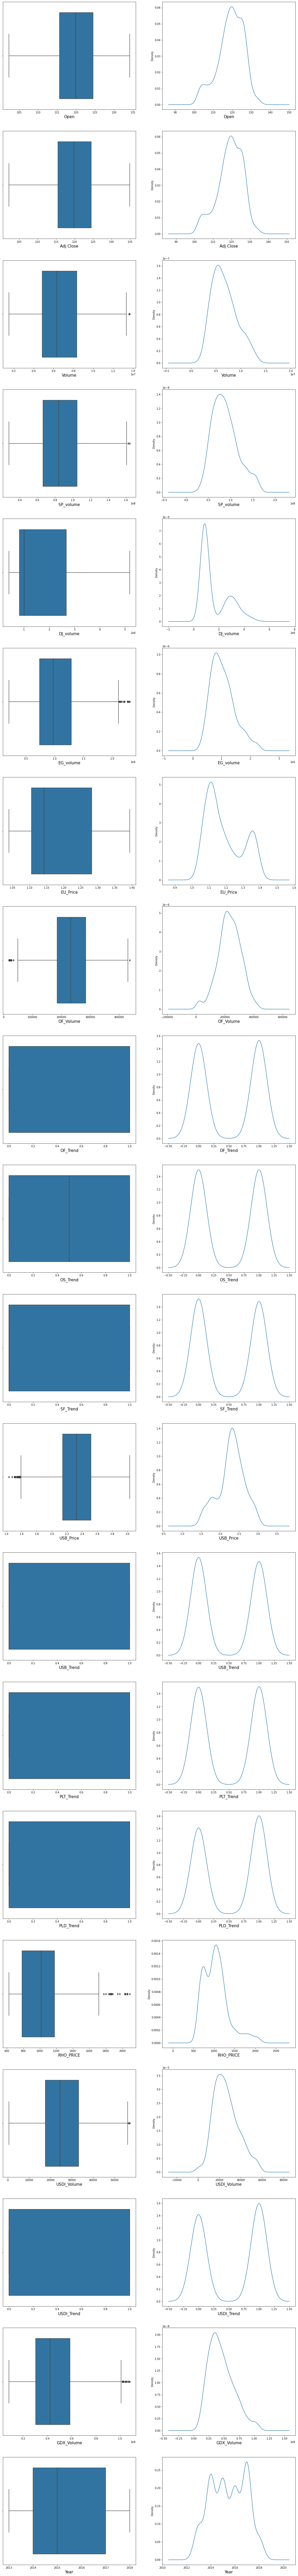

In [61]:
# Checking outliers status in the samples after the manual removal
plot_distribution_in_features(df=df,features_to_ignore=features_to_ignore_when_dealing_with_outliers)

### Manual removal of outliers in `EG_volume`

In [62]:
column="EG_volume"

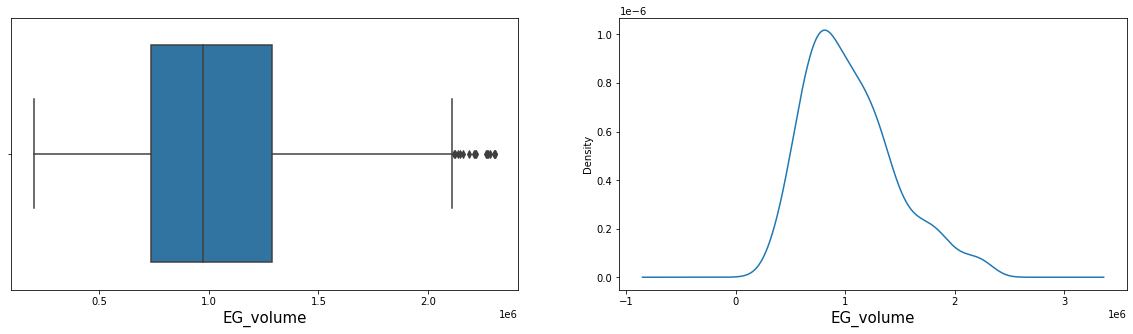

In [63]:
plot_distribution_in_feature(df=df, feature=column)

In [64]:
upper_bound_value= 2.3e6
upper_bound_value

2300000.0

In [65]:
print(sorted(set(df[ df[column] > upper_bound_value ][column].to_list())))

[2302000, 2305200, 2305700]


df.shape before outliers removal : (759, 20)
Total number of outliers in data : 16
df.shape after outliers removal : (743, 20)


D:\WorkBench\Cours\Hamoye\Team\01 - gold prices\src\tasks\task-4-model-development\ekoue\functions\cleaning_utilities.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers_indexes,inplace=drop_in_place, axis=0)


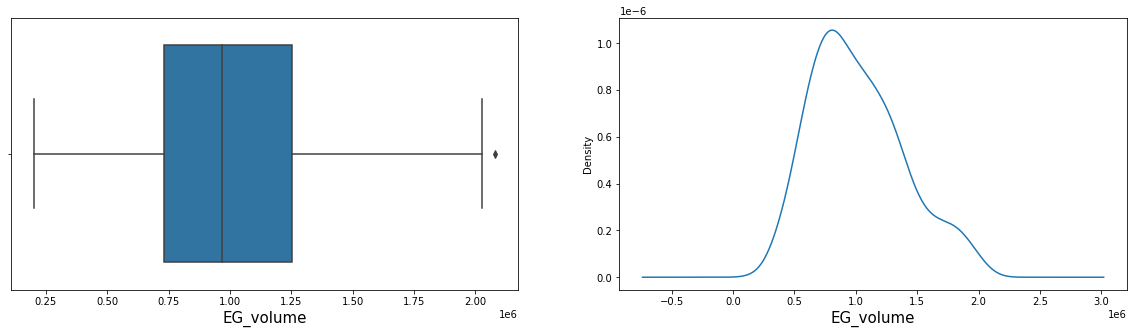

In [66]:
new_df = remove_upper_bound_outliers_in_feature(df=df,feature=column, upper_bound=upper_bound_value)

In [67]:
df = new_df

### Checking outliers presence in all features

Processing column : Open
Processing column : Adj Close
Processing column : Volume
Processing column : SP_volume
Processing column : DJ_volume
Processing column : EG_volume
Processing column : EU_Price
Processing column : OF_Volume
Processing column : OF_Trend
Processing column : OS_Trend
Processing column : SF_Trend
Processing column : USB_Price
Processing column : USB_Trend
Processing column : PLT_Trend
Processing column : PLD_Trend
Processing column : RHO_PRICE
Processing column : USDI_Volume
Processing column : USDI_Trend
Processing column : GDX_Volume
Processing column : Year


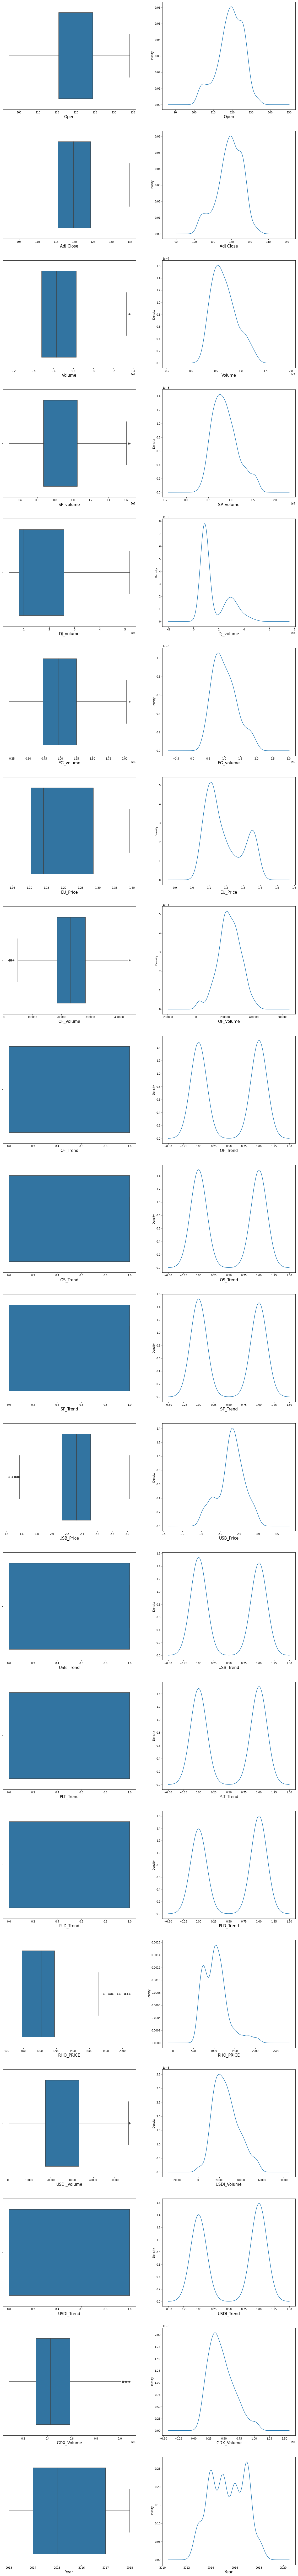

In [68]:
# Checking outliers status in the samples after the manual removal
plot_distribution_in_features(df=df,features_to_ignore=features_to_ignore_when_dealing_with_outliers)

### Manual removal of outliers in `RHO_PRICE`

In [69]:
column="RHO_PRICE"

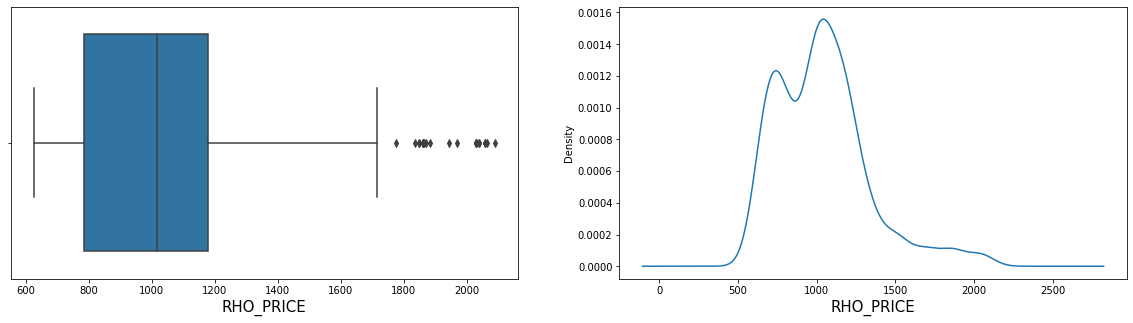

In [70]:
plot_distribution_in_feature(df=df, feature=column)

In [77]:
upper_bound_value= 1740

In [78]:
print(sorted(set(df[ df[column] > upper_bound_value ][column].to_list())))

[1775, 1835, 1850, 1860, 1865, 1870, 1885, 1945, 1970, 2030, 2040, 2060, 2065, 2090]


df.shape before outliers removal : (717, 20)
Total number of outliers in data : 0
df.shape after outliers removal : (717, 20)


D:\WorkBench\Cours\Hamoye\Team\01 - gold prices\src\tasks\task-4-model-development\ekoue\functions\cleaning_utilities.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers_indexes,inplace=drop_in_place, axis=0)


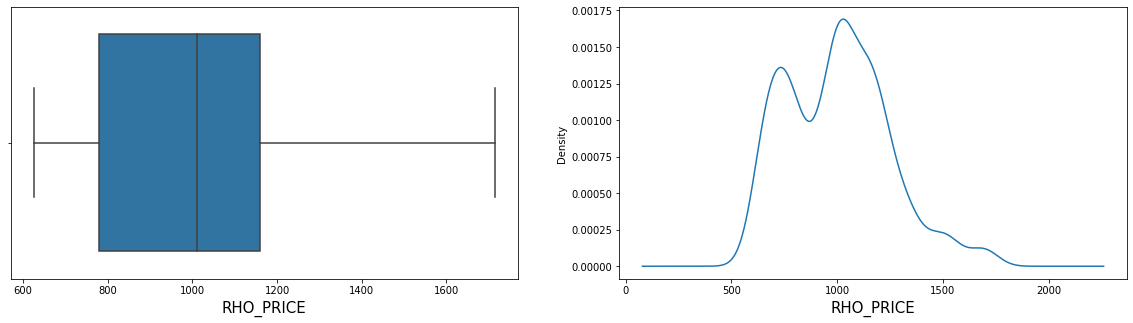

In [79]:
new_df = remove_upper_bound_outliers_in_feature(df=df,feature=column, upper_bound=upper_bound_value)

In [80]:
df = new_df

### Checking outliers presence in all features

Processing column : Open
Processing column : Adj Close
Processing column : Volume
Processing column : SP_volume
Processing column : DJ_volume
Processing column : EG_volume
Processing column : EU_Price
Processing column : OF_Volume
Processing column : OF_Trend
Processing column : OS_Trend
Processing column : SF_Trend
Processing column : USB_Price
Processing column : USB_Trend
Processing column : PLT_Trend
Processing column : PLD_Trend
Processing column : RHO_PRICE
Processing column : USDI_Volume
Processing column : USDI_Trend
Processing column : GDX_Volume
Processing column : Year


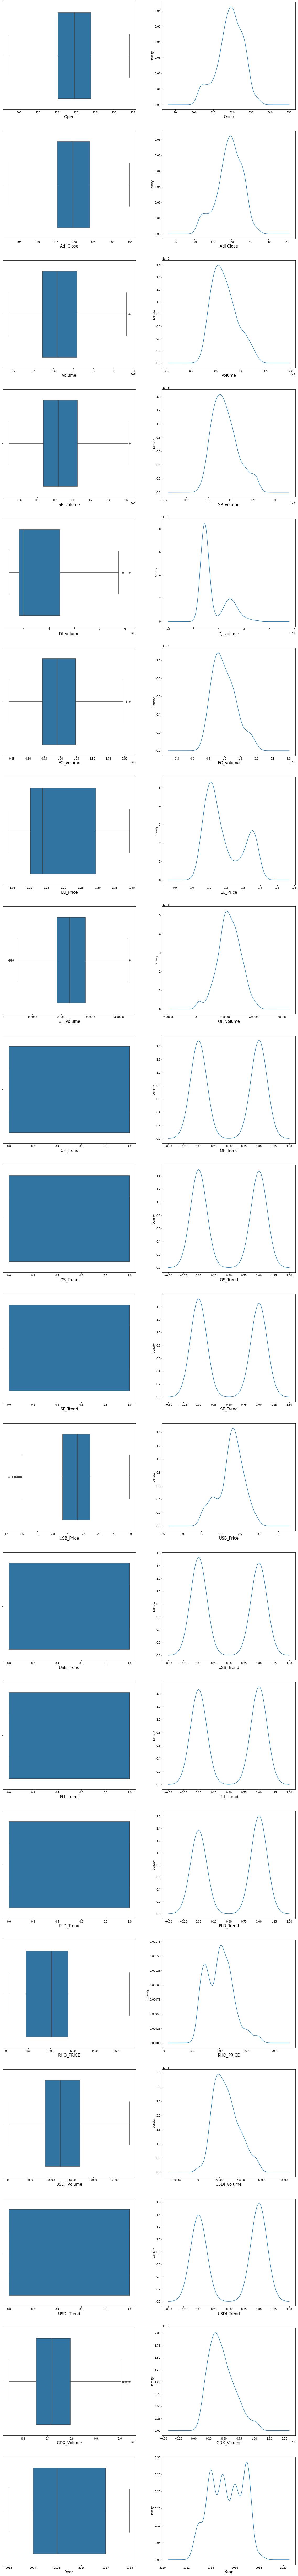

In [81]:
# Checking outliers status in the samples after the manual removal
plot_distribution_in_features(df=df,features_to_ignore=features_to_ignore_when_dealing_with_outliers)

### Manual removal of outliers in `USB_Price`

In [82]:
column="USB_Price"

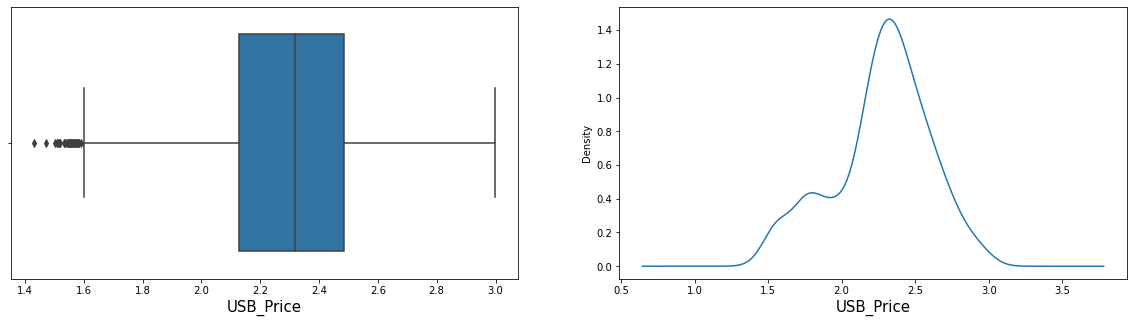

In [83]:
plot_distribution_in_feature(df=df, feature=column)

In [84]:
lower_bound_value= 1.6

In [85]:
print(sorted(set(df[ df[column] < lower_bound_value ][column].to_list())))

[1.43, 1.473, 1.5019999999999998, 1.508, 1.513, 1.517, 1.52, 1.534, 1.536, 1.537, 1.544, 1.545, 1.546, 1.5490000000000002, 1.554, 1.556, 1.558, 1.56, 1.561, 1.5630000000000002, 1.5659999999999998, 1.57, 1.5719999999999998, 1.575, 1.578, 1.58, 1.582, 1.584, 1.592]


df.shape before outliers removal : (684, 20)
Total number of outliers in data : 9
df.shape after outliers removal : (675, 20)


D:\WorkBench\Cours\Hamoye\Team\01 - gold prices\src\tasks\task-4-model-development\ekoue\functions\cleaning_utilities.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers_indexes,inplace=drop_in_place, axis=0)


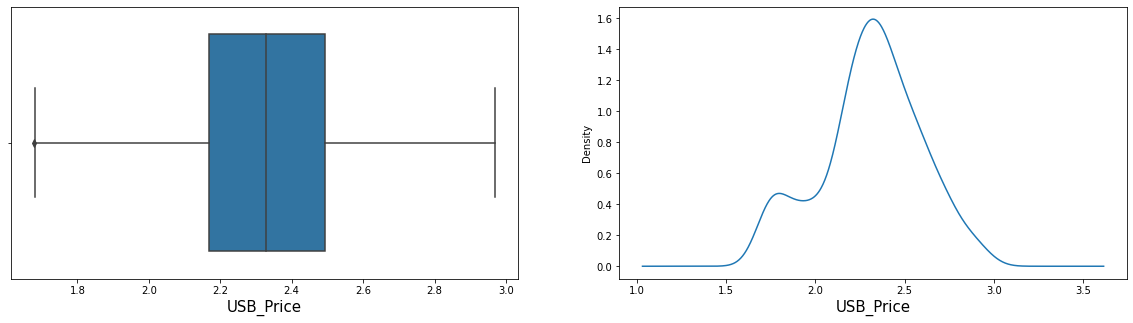

In [86]:
new_df = remove_lower_bound_outliers_in_feature(df=new_df,feature=column, lower_bound=lower_bound_value)

In [87]:
df = new_df

### Checking outliers presence in all features

Processing column : Open
Processing column : Adj Close
Processing column : Volume
Processing column : SP_volume
Processing column : DJ_volume
Processing column : EG_volume
Processing column : EU_Price
Processing column : OF_Volume
Processing column : OF_Trend
Processing column : OS_Trend
Processing column : SF_Trend
Processing column : USB_Price
Processing column : USB_Trend
Processing column : PLT_Trend
Processing column : PLD_Trend
Processing column : RHO_PRICE
Processing column : USDI_Volume
Processing column : USDI_Trend
Processing column : GDX_Volume
Processing column : Year


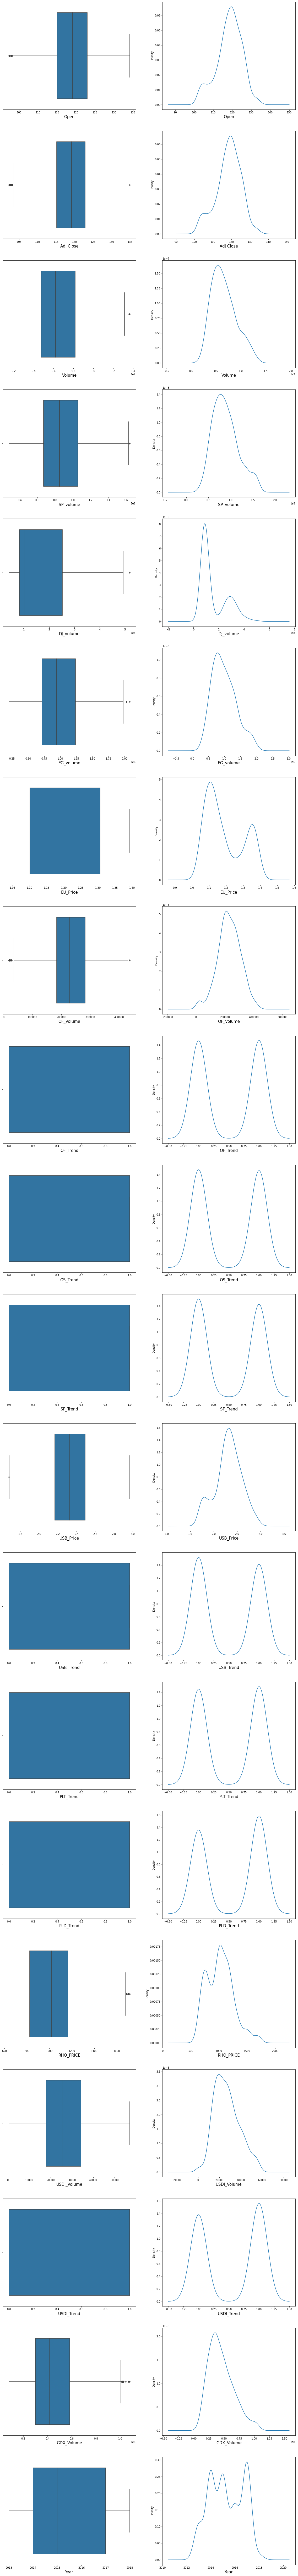

In [88]:
# Checking outliers status in the samples after the manual removal
plot_distribution_in_features(df=df,features_to_ignore=features_to_ignore_when_dealing_with_outliers)

### Manual removal of outliers in `GDX_volume`

In [90]:
column="GDX_Volume"

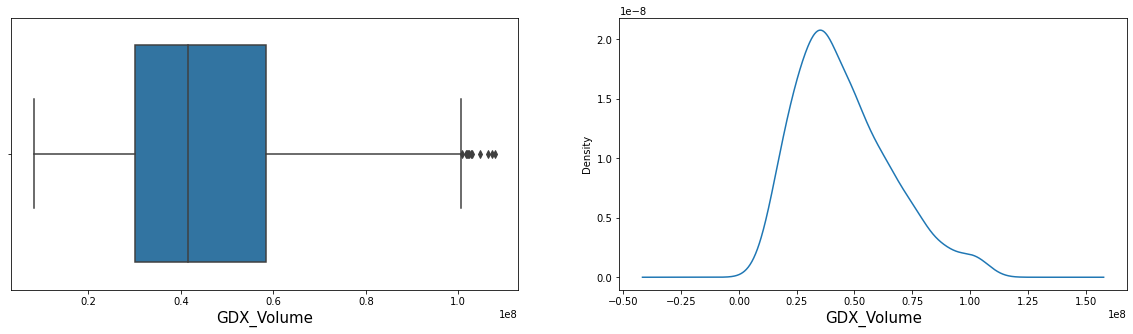

In [91]:
plot_distribution_in_feature(df=df, feature=column)

In [94]:
upper_bound_value= 1e8
upper_bound_value

100000000.0

In [95]:
print(sorted(set(df[ df[column] > upper_bound_value ][column].to_list())))

[100086900, 100582700, 100823000, 101689200, 101956100, 102197900, 102332100, 102655900, 103000000, 104691600, 106526900, 107240500, 107920500]


df.shape before outliers removal : (662, 20)
Total number of outliers in data : 4
df.shape after outliers removal : (658, 20)


D:\WorkBench\Cours\Hamoye\Team\01 - gold prices\src\tasks\task-4-model-development\ekoue\functions\cleaning_utilities.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers_indexes,inplace=drop_in_place, axis=0)


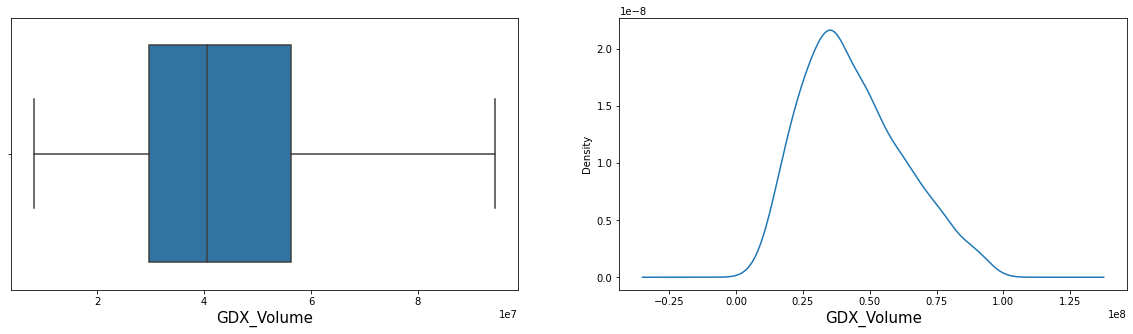

In [96]:
new_df = remove_upper_bound_outliers_in_feature(df=df,feature=column, upper_bound=upper_bound_value)

In [97]:
df = new_df

### Checking outliers presence in all features

Processing column : Open
Processing column : Adj Close
Processing column : Volume
Processing column : SP_volume
Processing column : DJ_volume
Processing column : EG_volume
Processing column : EU_Price
Processing column : OF_Volume
Processing column : OF_Trend
Processing column : OS_Trend
Processing column : SF_Trend
Processing column : USB_Price
Processing column : USB_Trend
Processing column : PLT_Trend
Processing column : PLD_Trend
Processing column : RHO_PRICE
Processing column : USDI_Volume
Processing column : USDI_Trend
Processing column : GDX_Volume
Processing column : Year


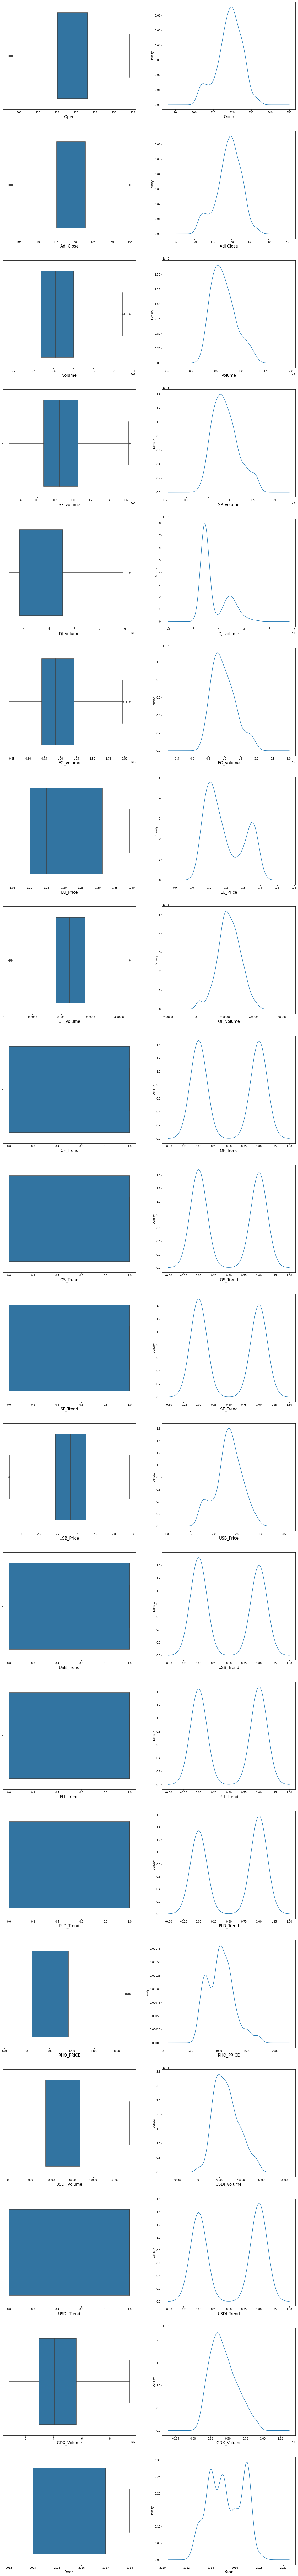

In [98]:
# Checking outliers status in the samples after the manual removal
plot_distribution_in_features(df=df,features_to_ignore=features_to_ignore_when_dealing_with_outliers)

Removing outliers in a feature tends to generate outliers in other feature. Since we make sure to remove nearly all outliers in the output variable, and most outliers in the input variables, we are going to proceed to the next stage of the work.

## EDA

*TODO: perform EDA on the available data after outliers removal*

## Pre-processing data

In [100]:
# shuffle df in order to avoid bias in the future models
df = df.sample(frac=1, random_state=42)
df.head().T

1234          802           940           509   \
Open         1.146500e+02  1.153600e+02  1.030900e+02  1.274200e+02   
Adj Close    1.150500e+02  1.163300e+02  1.038500e+02  1.274000e+02   
Volume       1.226150e+07  8.054400e+06  6.300500e+06  7.685800e+06   
SP_volume    1.291686e+08  8.686350e+07  1.213152e+08  8.046090e+07   
DJ_volume    4.352600e+08  1.249300e+08  1.136600e+08  9.125000e+07   
EG_volume    8.577000e+05  1.030800e+06  5.429000e+05  1.262900e+06   
EU_Price     1.070300e+00  1.098100e+00  1.081700e+00  1.375800e+00   
OF_Volume    2.935400e+05  1.964600e+05  1.324900e+05  1.503500e+05   
OF_Trend     1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
OS_Trend     1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
SF_Trend     1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
USB_Price    2.467000e+00  2.003000e+00  2.315000e+00  2.709000e+00   
USB_Trend    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
PLT_Trend    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
PLD_Trend    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
RHO_PRICE    8.550000e+02  1.145000e+03  7.400000e+02  1.070000e+03   
USDI_Volume  4.055000e+04  5.216000e+04  4.454000e+04  1.720000e+04   
USDI_Trend   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
GDX_Volume   5.621240e+07  6.116970e+07  4.179290e+07  3.054670e+07   
Year         2.017000e+03  2.015000e+03  2.015000e+03  2.014000e+03   

                     1408  
Open         1.207200e+02  
Adj Close    1.208300e+02  
Volume       3.728700e+06  
SP_volume    6.681020e+07  
DJ_volume    2.388300e+08  
EG_volume    1.006300e+06  
EU_Price     1.174400e+00  
OF_Volume    2.754200e+05  
OF_Trend     0.000000e+00  
OS_Trend     0.000000e+00  
SF_Trend     0.000000e+00  
USB_Price    2.325000e+00  
USB_Trend    0.000000e+00  
PLT_Trend    1.000000e+00  
PLD_Trend    1.000000e+00  
RHO_PRICE    1.185000e+03  
USDI_Volume  1.765000e+04  
USDI_Trend   1.000000e+00  
GDX_Volume   3.876670e+07  
Year         2.017000e+03

In [101]:
# Extracting the target variable
df_Y = df.pop("Adj Close")
df_Y[:5]

1234    115.050003
802     116.330002
940     103.849998
509     127.400002
1408    120.830002
Name: Adj Close, dtype: float64

In [103]:
# Defining the input variables
df_X = df.loc[:,:]
df_X.head().T

1234          802           940           509   \
Open         1.146500e+02  1.153600e+02  1.030900e+02  1.274200e+02   
Volume       1.226150e+07  8.054400e+06  6.300500e+06  7.685800e+06   
SP_volume    1.291686e+08  8.686350e+07  1.213152e+08  8.046090e+07   
DJ_volume    4.352600e+08  1.249300e+08  1.136600e+08  9.125000e+07   
EG_volume    8.577000e+05  1.030800e+06  5.429000e+05  1.262900e+06   
EU_Price     1.070300e+00  1.098100e+00  1.081700e+00  1.375800e+00   
OF_Volume    2.935400e+05  1.964600e+05  1.324900e+05  1.503500e+05   
OF_Trend     1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
OS_Trend     1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
SF_Trend     1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
USB_Price    2.467000e+00  2.003000e+00  2.315000e+00  2.709000e+00   
USB_Trend    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
PLT_Trend    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
PLD_Trend    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
RHO_PRICE    8.550000e+02  1.145000e+03  7.400000e+02  1.070000e+03   
USDI_Volume  4.055000e+04  5.216000e+04  4.454000e+04  1.720000e+04   
USDI_Trend   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
GDX_Volume   5.621240e+07  6.116970e+07  4.179290e+07  3.054670e+07   
Year         2.017000e+03  2.015000e+03  2.015000e+03  2.014000e+03   

                     1408  
Open         1.207200e+02  
Volume       3.728700e+06  
SP_volume    6.681020e+07  
DJ_volume    2.388300e+08  
EG_volume    1.006300e+06  
EU_Price     1.174400e+00  
OF_Volume    2.754200e+05  
OF_Trend     0.000000e+00  
OS_Trend     0.000000e+00  
SF_Trend     0.000000e+00  
USB_Price    2.325000e+00  
USB_Trend    0.000000e+00  
PLT_Trend    1.000000e+00  
PLD_Trend    1.000000e+00  
RHO_PRICE    1.185000e+03  
USDI_Volume  1.765000e+04  
USDI_Trend   1.000000e+00  
GDX_Volume   3.876670e+07  
Year         2.017000e+03

In [104]:
# Recalling the distribution of the target variable
df_Y.describe()

count    658.000000
mean     118.544848
std        6.645827
min      102.199997
25%      115.125002
50%      119.309998
75%      122.934997
max      134.899994
Name: Adj Close, dtype: float64

In [105]:
# Recalling the input variables structure
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, 1234 to 1481
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         658 non-null    float64
 1   Volume       658 non-null    int64  
 2   SP_volume    658 non-null    int64  
 3   DJ_volume    658 non-null    int64  
 4   EG_volume    658 non-null    int64  
 5   EU_Price     658 non-null    float64
 6   OF_Volume    658 non-null    int64  
 7   OF_Trend     658 non-null    int64  
 8   OS_Trend     658 non-null    int64  
 9   SF_Trend     658 non-null    int64  
 10  USB_Price    658 non-null    float64
 11  USB_Trend    658 non-null    int64  
 12  PLT_Trend    658 non-null    int64  
 13  PLD_Trend    658 non-null    int64  
 14  RHO_PRICE    658 non-null    int64  
 15  USDI_Volume  658 non-null    int64  
 16  USDI_Trend   658 non-null    int64  
 17  GDX_Volume   658 non-null    int64  
 18  Year         658 non-null    int64  
dtypes: float6

In [106]:
categorical_columns=[]
numerical_columns=[]
    
#if len(features_to_ignore)>0:
#    df.drop(features_to_ignore, axis=1,inplace=True)
    
# Determine categorical features and numerical ones
for i in range(len(df.columns)):
    column_name = df.columns[i]
        
    if df[column_name].dtype == "O" : # Column type is Categorical
        categorical_columns.append(column_name)
    else: # Column type is Numerical
        numerical_columns.append(column_name)

In [107]:
categorical_columns

[]

In [108]:
numerical_columns

['Open',
 'Volume',
 'SP_volume',
 'DJ_volume',
 'EG_volume',
 'EU_Price',
 'OF_Volume',
 'OF_Trend',
 'OS_Trend',
 'SF_Trend',
 'USB_Price',
 'USB_Trend',
 'PLT_Trend',
 'PLD_Trend',
 'RHO_PRICE',
 'USDI_Volume',
 'USDI_Trend',
 'GDX_Volume',
 'Year']

In [109]:
# Create a column transformer
column_transformer_1 = make_column_transformer(
     # The features indicated in the list below are those that will be rescaled at this stage of the preprocessing
    ( MinMaxScaler(), numerical_columns ),
    # The features indicated in the list below are those that will be normalized at this stage of the preprocessing
    ( Normalizer(), numerical_columns ),
    
    # handle_unknown="ignore" (in the below code) will make the OneHotEncoder() ignore any column it doesn't know about
    (OneHotEncoder(handle_unknown="ignore"), categorical_columns ),
    #(LabelEncoder(), categorical_columns)   
)

column_transformer_1

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Open', 'Volume', 'SP_volume', 'DJ_volume',
                                  'EG_volume', 'EU_Price', 'OF_Volume',
                                  'OF_Trend', 'OS_Trend', 'SF_Trend',
                                  'USB_Price', 'USB_Trend', 'PLT_Trend',
                                  'PLD_Trend', 'RHO_PRICE', 'USDI_Volume',
                                  'USDI_Trend', 'GDX_Volume', 'Year']),
                                ('normalizer', Normalizer(),
                                 ['Open', 'Volume', 'SP_volume', 'DJ_volume',
                                  'EG_volume', 'EU_Price', 'OF_Volume',
                                  'OF_Trend', 'OS_Trend', 'SF_Trend',
                                  'USB_Price', 'USB_Trend', 'PLT_Trend',
                                  'PLD_Trend', 'RHO_PRICE', 'USDI_Volume',
                                  'USDI_Trend', 'GDX_Volume', 'Yea

In [110]:
df_X.shape

(658, 19)

In [111]:
# Build train and testing sets
X_train, X_test, y_train, y_test= train_test_split(df_X, df_Y, test_size=.1, random_state=42, shuffle=True )

In [113]:
X_train.head().T

484           762           822           1254  \
Open         1.181100e+02  1.165000e+02  1.137800e+02  1.170400e+02   
Volume       3.972800e+06  7.993300e+06  2.681100e+06  6.166900e+06   
SP_volume    9.068340e+07  8.749140e+07  9.321400e+07  8.894610e+07   
DJ_volume    8.399000e+07  8.979000e+07  9.640000e+07  3.368800e+08   
EG_volume    9.096000e+05  1.806700e+06  6.410000e+05  6.849000e+05   
EU_Price     1.360900e+00  1.118500e+00  1.090500e+00  1.053700e+00   
OF_Volume    1.753700e+05  2.860700e+05  2.570600e+05  3.354400e+05   
OF_Trend     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
OS_Trend     0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
SF_Trend     1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
USB_Price    2.969000e+00  2.089000e+00  2.130000e+00  2.431000e+00   
USB_Trend    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
PLT_Trend    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
PLD_Trend    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
RHO_PRICE    1.050000e+03  1.180000e+03  1.080000e+03  9.000000e+02   
USDI_Volume  2.807000e+04  2.048000e+04  5.513000e+04  2.883000e+04   
USDI_Trend   0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
GDX_Volume   2.681690e+07  5.132640e+07  2.546300e+07  5.022630e+07   
Year         2.014000e+03  2.015000e+03  2.015000e+03  2.017000e+03   

                     674   
Open         1.202700e+02  
Volume       4.566100e+06  
SP_volume    1.549490e+08  
DJ_volume    1.051100e+08  
EG_volume    8.039000e+05  
EU_Price     1.271500e+00  
OF_Volume    2.583900e+05  
OF_Trend     1.000000e+00  
OS_Trend     1.000000e+00  
SF_Trend     1.000000e+00  
USB_Price    2.227000e+00  
USB_Trend    1.000000e+00  
PLT_Trend    1.000000e+00  
PLD_Trend    1.000000e+00  
RHO_PRICE    1.230000e+03  
USDI_Volume  3.241000e+04  
USDI_Trend   1.000000e+00  
GDX_Volume   2.170210e+07  
Year         2.014000e+03

In [114]:
X_train.shape, X_test.shape

((592, 19), (66, 19))

Now we will fit the column transformer to the training data.        
*🔑  Whenever we have a column transformer, we need to fit it the training data and then use that fit column transformer to transform the test data.*

In [115]:
# Fit the column transformer to the training data
column_transformer_1.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Open', 'Volume', 'SP_volume', 'DJ_volume',
                                  'EG_volume', 'EU_Price', 'OF_Volume',
                                  'OF_Trend', 'OS_Trend', 'SF_Trend',
                                  'USB_Price', 'USB_Trend', 'PLT_Trend',
                                  'PLD_Trend', 'RHO_PRICE', 'USDI_Volume',
                                  'USDI_Trend', 'GDX_Volume', 'Year']),
                                ('normalizer', Normalizer(),
                                 ['Open', 'Volume', 'SP_volume', 'DJ_volume',
                                  'EG_volume', 'EU_Price', 'OF_Volume',
                                  'OF_Trend', 'OS_Trend', 'SF_Trend',
                                  'USB_Price', 'USB_Trend', 'PLT_Trend',
                                  'PLD_Trend', 'RHO_PRICE', 'USDI_Volume',
                                  'USDI_Trend', 'GDX_Volume', 'Yea

In [134]:
# Save the column transformer in a file (with pickle)
pickle.dump(column_transformer_1, open(f"{exported_element_folder}/column_transformer_1.pkl", "wb"))

Now we will take what was learned from the training data by the column transformer to transform the training and testing data.

In [116]:
# Transform train set with column transformer
X_train_normal = column_transformer_1.transform(X_train)
X_train_normal[:2]

array([[4.95586413e-01, 2.03347432e-01, 4.61407454e-01, 9.64569105e-02,
        3.77242003e-01, 9.08373273e-01, 3.92538058e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 3.81395349e-01, 4.87097914e-01,
        0.00000000e+00, 2.16349349e-01, 2.00000000e-01, 9.33345326e-07,
        3.13944144e-02, 7.16611014e-01, 6.63717495e-01, 7.18796801e-03,
        1.07542938e-08, 1.38583328e-03, 0.00000000e+00, 0.00000000e+00,
        7.90233950e-09, 2.34620460e-08, 0.00000000e+00, 7.90233950e-09,
        0.00000000e+00, 8.29745647e-06, 2.21818670e-04, 0.00000000e+00,
        2.11916248e-01, 1.59153118e-05],
       [4.44829764e-01, 5.34181986e-01, 4.37965066e-01, 1.09276573e-01,
        8.54702219e-01, 2.24978855e-01, 6.68804592e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 3.18357862e-01, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 5.02325581e-01, 3.52951573e-01,
        1.00000000e+00,

In [117]:
X_train_normal.shape

(592, 38)

In [118]:
# Transform testing set with column transformer
X_test_normal = column_transformer_1.transform(X_test)
X_test_normal[:2]

array([[6.00252200e-01, 3.90673601e-01, 1.64303088e-01, 9.96640364e-01,
        6.23396668e-01, 3.60868339e-01, 7.91290242e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 5.64678544e-01, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 6.60465116e-01, 1.80275716e-01,
        1.00000000e+00, 9.96584220e-02, 8.00000000e-01, 2.45736664e-07,
        1.26466453e-02, 1.01647110e-01, 9.94157898e-01, 2.77670491e-03,
        2.36103900e-09, 6.78239668e-04, 0.00000000e+00, 0.00000000e+00,
        2.02368990e-09, 4.87102158e-09, 2.02368990e-09, 2.02368990e-09,
        0.00000000e+00, 2.73198136e-06, 2.16737188e-05, 2.02368990e-09,
        3.39091503e-02, 4.08178252e-06],
       [4.38839789e-01, 3.10476770e-01, 8.81707740e-01, 8.63559004e-02,
        3.21837245e-01, 6.43642515e-01, 5.10481657e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.13555383e-01, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 5.34883721e-01, 7.45669848e-01,
        0.00000000e+00,

## Experimenting on ML models 

In [119]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

We are going to experiment on different ML algorithms in order to find the best performing one.

In [120]:
# Defining experiments algorithms

folds = 5 #20

models = {
    "RandomForestRegressor":{
        "model":RandomForestRegressor(random_state=42),
        "parameters":{
            "n_estimators": [80, 90, 100, 110, 120],
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10],
            "max_features": ['auto', 'sqrt', 'log2'],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False]
        },
        "fold":folds,
        "scoring":"neg_mean_absolute_error",
    },    
    "Ridge":{
        "model":Ridge(),
        "parameters":{"alpha": [0.0001, 0.001, 0.01, 0.05, 
                                0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                                1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                10.0, 20, 50, 100, 500, 1000 ]
                     },
        "fold":folds,
        "scoring":"neg_mean_absolute_error",
    },
    "Lasso":{
        "model": Lasso(),
        "parameters":{
            "alpha": [0.001, 0.005, 0.01, 0.03]
        },
        "fold":folds,
        "scoring":"neg_mean_absolute_error",
    },
#     "LinearRegression": {
#         "model":LinearRegression(),
#         "parameters":{
#             "n_features_to_select": list(range(1, 14))
#         }
#     },
    
    "GradientBoostingRegressor":{
        "model":GradientBoostingRegressor(random_state=42),
        "parameters": {"learning_rate": [0.0001,0.001,0.01,0.02,0.03,0.04],
                       "subsample"    : [0.9, 0.5, 0.2, 0.1],
                       "n_estimators" : [65, 70, 75, 100,500,1000, 1500],
                       "max_depth"    : [4,6,8,10]
                      },
        "fold":folds,
        "scoring":"neg_mean_absolute_error",
    },
    "SVR":{
        "model": SVR(),
        "parameters":{
            "C": [5.0, 7.0, 10.0],
            "kernel": ["linear", "rbf"]
        }
    },
    "XGBRegressor":{
        "model": XGBRegressor(random_state=42),
        "parameters":{
            "n_estimators": [180, 200, 230, 250],
            "learning_rate": [0.1, 0.05, 0.01, 0.001],
            "max_depth": [6, 7, 8, 10]
        },
        "fold":folds,
        "scoring":"neg_mean_absolute_error",
    },
    "DecisionTreeRegressor":{
        "model": DecisionTreeRegressor(random_state=42),
        "parameters":{
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        "fold":folds,
        "scoring":"neg_mean_absolute_error",
    }
}

In [124]:
# Defining the number of sample to use when searching for the best algorithms
search_on_top_k = int(X_train_normal.shape[0]/10)
search_on_top_k

59

In [125]:
report_df = search_best_regresion_models_by_cross_validation(algorithms=models,
                                                             X_train=X_train_normal, y_train=y_train,
                                                             X_test=X_test_normal, y_test=y_test,
                                                             search_on_top_k=search_on_top_k)

============== Working on RandomForestRegressor algorithm ==============
Defining GridSearchCV...
Starting best estimator research with GridSearchCV...
Found best estimator
Starting evaluating best estimator...
Evaluated best estimator.
Generated report.

 

============== Working on Ridge algorithm ==============
Defining GridSearchCV...
Starting best estimator research with GridSearchCV...
Found best estimator
Starting evaluating best estimator...
Evaluated best estimator.
Generated report.

 

============== Working on Lasso algorithm ==============
Defining GridSearchCV...
Starting best estimator research with GridSearchCV...
Found best estimator
Starting evaluating best estimator...
Evaluated best estimator.
Generated report.

 

============== Working on GradientBoostingRegressor algorithm ==============
Defining GridSearchCV...
Starting best estimator research with GridSearchCV...
Found best estimator
Starting evaluating best estimator...
Evaluated best estimator.
Generated repo

In [126]:
# Looking at our training report
report_df

algo  \
0      RandomForestRegressor   
1                      Ridge   
2                      Lasso   
3  GradientBoostingRegressor   
4                        SVR   
5               XGBRegressor   
6      DecisionTreeRegressor   

                                        best_params_  best_score_  \
0  {'bootstrap': True, 'max_depth': 5, 'max_featu...    -0.784230   
1                                   {'alpha': 0.001}    -0.361055   
2                                    {'alpha': 0.01}    -0.290317   
3  {'learning_rate': 0.02, 'max_depth': 4, 'n_est...    -0.724244   
4                    {'C': 10.0, 'kernel': 'linear'}     0.987203   
5  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...    -0.613202   
6  {'max_depth': None, 'min_samples_leaf': 2, 'mi...    -1.083495   

                                     best_estimator_       mae       mse  \
0  (DecisionTreeRegressor(max_depth=5, max_featur...  0.872858  1.630532   
1                                 Ridge(alpha=0.001)  0.508181  0.468926   
2                                  Lasso(alpha=0.01)  0.470599  0.399598   
3  ([DecisionTreeRegressor(criterion='friedman_ms...  0.640591  0.801672   
4                       SVR(C=10.0, kernel='linear')  0.642641  0.752898   
5  XGBRegressor(base_score=0.5, booster='gbtree',...  0.608157  0.636988   
6  DecisionTreeRegressor(min_samples_leaf=2, min_...  0.826144  1.214708   

       rmse  r2_score  
0  1.276923  0.973031  
1  0.684781  0.992244  
2  0.632137  0.993391  
3  0.895361  0.986740  
4  0.867697  0.987547  
5  0.798115  0.989464  
6  1.102138  0.979909

We can see from the RMSEs that the trained models are not doing a very good job at predicting; however this is to be expected since we don't feed them enough data.

Lasso algorithm is the one giving us the best result, in respect to MSE and RMSE. So we are going to use it.

In [129]:
best_estimator_index=2

In [131]:
# Selecting the best estimator from available options
best_estimator = report_df.loc[best_estimator_index,"best_estimator_"]
best_estimator

Lasso(alpha=0.01)

In [132]:
# Trying our hand on the best estimator
best_estimator.predict(X_test_normal[:2,:])

array([121.77894073, 116.43532921])

In [133]:
# Looking at the real values of the values predicted above
y_test[:2]

1437    121.309998
665     116.360001
Name: Adj Close, dtype: float64

In [135]:
# Training the best estimator on whole dataset
ml_model, scores, score, error, kfold = train_regression_model_by_crossvalidation(model=best_estimator,
                                                                                  X_train=X_train_normal,
                                                                                  y_train=y_train,
                                                                                  X_test=X_test_normal, 
                                                                                  y_test=y_test,
                                                                                  n_folds=5)

Training started
Training folds scores : [0.99297198 0.9952686  0.99387668 0.99535105 0.9922229 ]
Trained model score : 0.9939382413165847
Trained model error : 0.001236586077425833
Training ended
************************************************************************


Trained model test MAE : 0.42686539247942273
Trained model test MSE : 0.34197791668274075
Trained model test RMSE : 0.5847887795458637
Trained model test R2 SCORE : 0.9944622314689712


Having trained on the whole dataset, we have much better result, which is surprising since we didn't use many samples. This could be explained by the fact that the gold price doesn't fluctuate that much, but it is to be confirmed by EDA.

In [138]:
# Predicting some values, in order to demonstrate how our model is performing
ml_model.predict(X_test_normal[-10:,:])

array([129.18496056, 128.9501721 , 103.38034212, 109.07181381,
       126.39787182, 121.72908533, 116.97863957, 127.89285654,
       128.52909505, 106.83374308])

In [139]:
y_test[-10:]

520     130.169998
444     129.899994
940     103.849998
1213    108.589996
592     126.500000
1433    121.209999
710     117.690002
395     127.739998
1485    128.830002
875     106.260002
Name: Adj Close, dtype: float64

In [140]:
# Save best model (with pickle)
pickle.dump(ml_model, open(f"{exported_element_folder}/best_model.pkl", "wb"))